In [420]:
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick
from scipy.stats import chi2_contingency

In [421]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 

In [422]:
df = pd.read_pickle('./Data/avpat_avtum_sactpat_sacttum_sactreg.pickle')
df.head()

,PATIENTID,SEX,ETHNICITY,NEWVITALSTATUS,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2
0,10000752,F,White British,A,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,10001050,F,White British,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,10001824,F,Other ethnic group,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,10002078,F,NaN,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,584.0,19.187252,1.598938,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,10003284,F,NaN,A,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,829.0,27.236699,2.269725,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [423]:
df.shape

(104243, 92)

In [424]:
df.isna().sum()

PATIENTID                0
SEX                      0
ETHNICITY             6746
NEWVITALSTATUS           0
NUMBER_TUMOURS           0
SC500                    0
SC501                    0
SC502                    0
SC503                    0
SC504                    0
SC505                    0
SC506                    0
SC508                    0
BEH_BENIGN               0
BEH_MALIG                0
BEH_MICINV               0
BEH_INSITU               0
BEH_UNCERT               0
T0                       0
T1                       0
T2                       0
T3                       0
T4                       0
N0                       0
N1                       0
N2                       0
N3                       0
M1                       0
STAGE0                   0
STAGE1                   0
STAGE2                   0
STAGE3                   0
STAGE4                   0
GRADE1                   0
GRADE2                   0
GRADE3                   0
GRADE4                   0
A

In [425]:
df.dtypes

PATIENTID                int64
SEX                   category
ETHNICITY             category
NEWVITALSTATUS        category
NUMBER_TUMOURS           int64
SC500                     bool
SC501                     bool
SC502                     bool
SC503                     bool
SC504                     bool
SC505                     bool
SC506                     bool
SC508                     bool
BEH_BENIGN                bool
BEH_MALIG                 bool
BEH_MICINV                bool
BEH_INSITU                bool
BEH_UNCERT                bool
T0                        bool
T1                        bool
T2                        bool
T3                        bool
T4                        bool
N0                        bool
N1                        bool
N2                        bool
N3                        bool
M1                        bool
STAGE0                    bool
STAGE1                    bool
STAGE2                    bool
STAGE3                    bool
STAGE4  

In [426]:
def dead(value):
    if value == 'D':
        return 1
    else:
        return 0

df['DEAD'] = df['NEWVITALSTATUS'].apply(dead)    
df['DEAD'].value_counts()

0    102948
1      1295
Name: DEAD, dtype: int64

In [427]:
df = df.drop(['NEWVITALSTATUS'], axis = 1)
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2,DEAD
0,10000752,F,White British,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,10001050,F,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001824,F,Other ethnic group,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10002078,F,NaN,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,584.0,19.187252,1.598938,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,10003284,F,NaN,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,829.0,27.236699,2.269725,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0


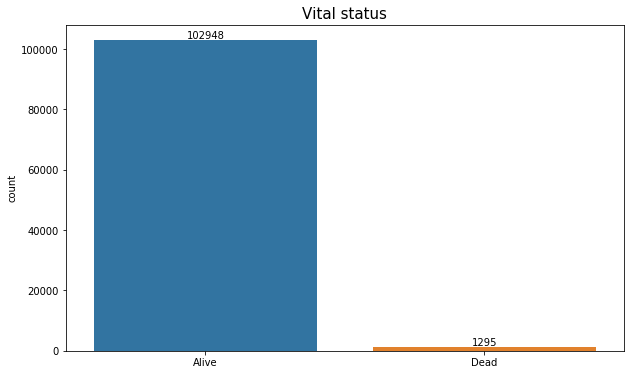

In [428]:
ax = sns.countplot(data = df, x = 'DEAD')
ax.set_xticklabels(['Alive', 'Dead'])
ax.set_title('Vital status', fontsize=15)
ax.set_xlabel('')
plt.gcf().set_size_inches(10,6)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, height, ha="center")

In [429]:
percentage_alive = np.mean(df['DEAD'] == 0) * 100
percentage_dead = np.mean(df['DEAD'] == 1) * 100
print("Percentage of patients classified as alive: %.2f" % percentage_alive)
print("Percentage of patients classified as dead: %.2f" % percentage_dead)

Percentage of patients classified as alive: 98.76
Percentage of patients classified as dead: 1.24


In [430]:
df.groupby('DEAD')['ETHNICITY'].value_counts()

DEAD  ETHNICITY                    
0     White British                    84885
      Other white background            3588
      Asian Indian                      1421
      Other ethnic group                1252
      Black Caribbean                    965
      White Irish                        774
      Asian Pakistani                    710
      Black African                      688
      Other Asian background             678
      Other black background             352
      Chinese                            295
      Other mixed background             210
      Asian Bangladeshi                  146
      White and black Caribbean          113
      Mixed white and Asian              107
      Mixed white and black African       76
      White                               13
      Other                                1
1     White British                     1083
      Other white background              48
      Other ethnic group                  15
      Asian Indian 

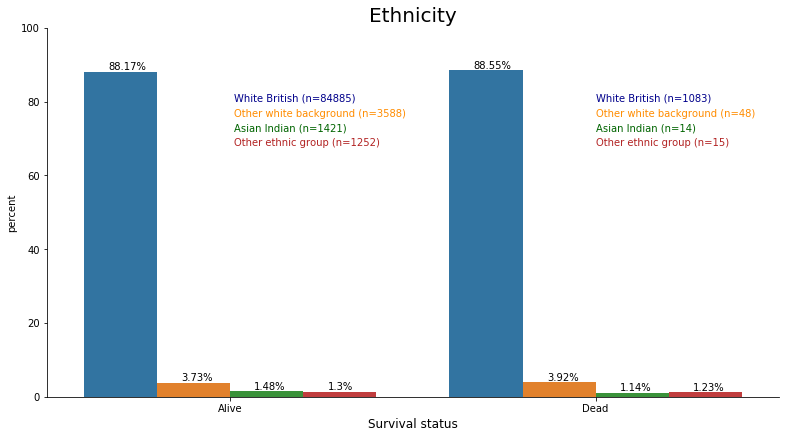

In [431]:
x, y = 'DEAD', 'ETHNICITY'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True).iloc[[0,1,2,3,18,19,20,21]]
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Ethnicity', fontsize=20)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(12,6)

for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 0.5
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "White British (n=84885)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 76, "Other white background (n=3588)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 72, "Asian Indian (n=1421)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(0.01, 68, "Other ethnic group (n=1252)", horizontalalignment='left', size='medium', color='firebrick')
ax.ax.text(1, 80, "White British (n=1083)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 76, "Other white background (n=48)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1, 72, "Asian Indian (n=14)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 68, "Other ethnic group (n=15)", horizontalalignment='left', size='medium', color='firebrick');

In [432]:
contingency = pd.crosstab(df['DEAD'], df['ETHNICITY'])
contingency

ETHNICITY,Asian Bangladeshi,Asian Indian,Asian Pakistani,Black African,Black Caribbean,Chinese,Mixed white and Asian,Mixed white and black African,Other,Other Asian background,Other black background,Other ethnic group,Other mixed background,Other white background,White,White British,White Irish,White and black Caribbean
DEAD,,,,,,,,,,,,,,,,,,
0,146,1421,710,688,965,295,107,76,1,678,352,1252,210,3588,13,84885,774,113
1,4,14,14,5,11,3,0,2,1,9,3,15,1,48,0,1083,10,0


In [433]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

2.0417940557758716e-05


In [434]:
# ax = df.groupby(['DEAD','SEX']).size().groupby(level=0).apply(
#     lambda x: 100 * x / x.sum()
# ).unstack().plot(kind='bar',stacked=True)

# ax.set(xticklabels=['Alive','Dead'])
# plt.xticks(rotation='horizontal')
# ax.set(xlabel='Survival status')
# ax.set(ylabel='Percentage')
# # plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
# plt.gcf().set_size_inches(10,5)

# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
#             '{:.2f} %'.format(height), 
#             horizontalalignment='center', 
#             verticalalignment='center')    

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


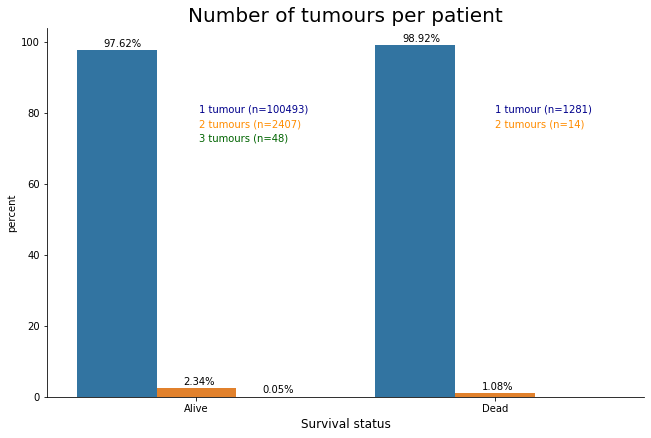

In [435]:
x, y = 'DEAD', 'NUMBER_TUMOURS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_title('Number of tumours per patient', fontsize=20)
plt.gcf().set_size_inches(10,6)

                
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.01, 80, "1 tumour (n=100493)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.01, 76, "2 tumours (n=2407)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.01, 72, "3 tumours (n=48)", horizontalalignment='left', size='medium', color='darkgreen')
ax.ax.text(1, 80, "1 tumour (n=1281)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1, 76, "2 tumours (n=14)", horizontalalignment='left', size='medium', color='darkorange');

In [436]:
df.groupby('DEAD')['NUMBER_TUMOURS'].value_counts()

DEAD  NUMBER_TUMOURS
0     1                 100493
      2                   2407
      3                     48
1     1                   1281
      2                     14
Name: NUMBER_TUMOURS, dtype: int64

In [437]:
contingency = pd.crosstab(df['DEAD'], df['NUMBER_TUMOURS'])
contingency

NUMBER_TUMOURS,1,2,3
DEAD,,,
0,100493,2407,48
1,1281,14,0


In [438]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.008534849177608815


In [439]:
df.groupby('DEAD')['SC500'].value_counts()

DEAD  SC500
0     False    101845
      True       1103
1     False      1282
      True         13
Name: SC500, dtype: int64

In [440]:
df.groupby('DEAD')['SC501'].value_counts()

DEAD  SC501
0     False    97482
      True      5466
1     False     1221
      True        74
Name: SC501, dtype: int64

In [441]:
df.groupby('DEAD')['SC502'].value_counts()

DEAD  SC502
0     False    93411
      True      9537
1     False     1180
      True       115
Name: SC502, dtype: int64

In [442]:
df.groupby('DEAD')['SC503'].value_counts()

DEAD  SC503
0     False    98038
      True      4910
1     False     1228
      True        67
Name: SC503, dtype: int64

In [443]:
df.groupby('DEAD')['SC504'].value_counts()

DEAD  SC504
0     False    72826
      True     30122
1     False      928
      True       367
Name: SC504, dtype: int64

In [444]:
df.groupby('DEAD')['SC505'].value_counts()

DEAD  SC505
0     False    97322
      True      5626
1     False     1219
      True        76
Name: SC505, dtype: int64

In [445]:
df.groupby('DEAD')['SC506'].value_counts()

DEAD  SC506
0     False    102411
      True        537
1     False      1286
      True          9
Name: SC506, dtype: int64

In [446]:
df.groupby('DEAD')['SC508'].value_counts()

DEAD  SC508
0     False    97185
      True      5763
1     False     1231
      True        64
Name: SC508, dtype: int64

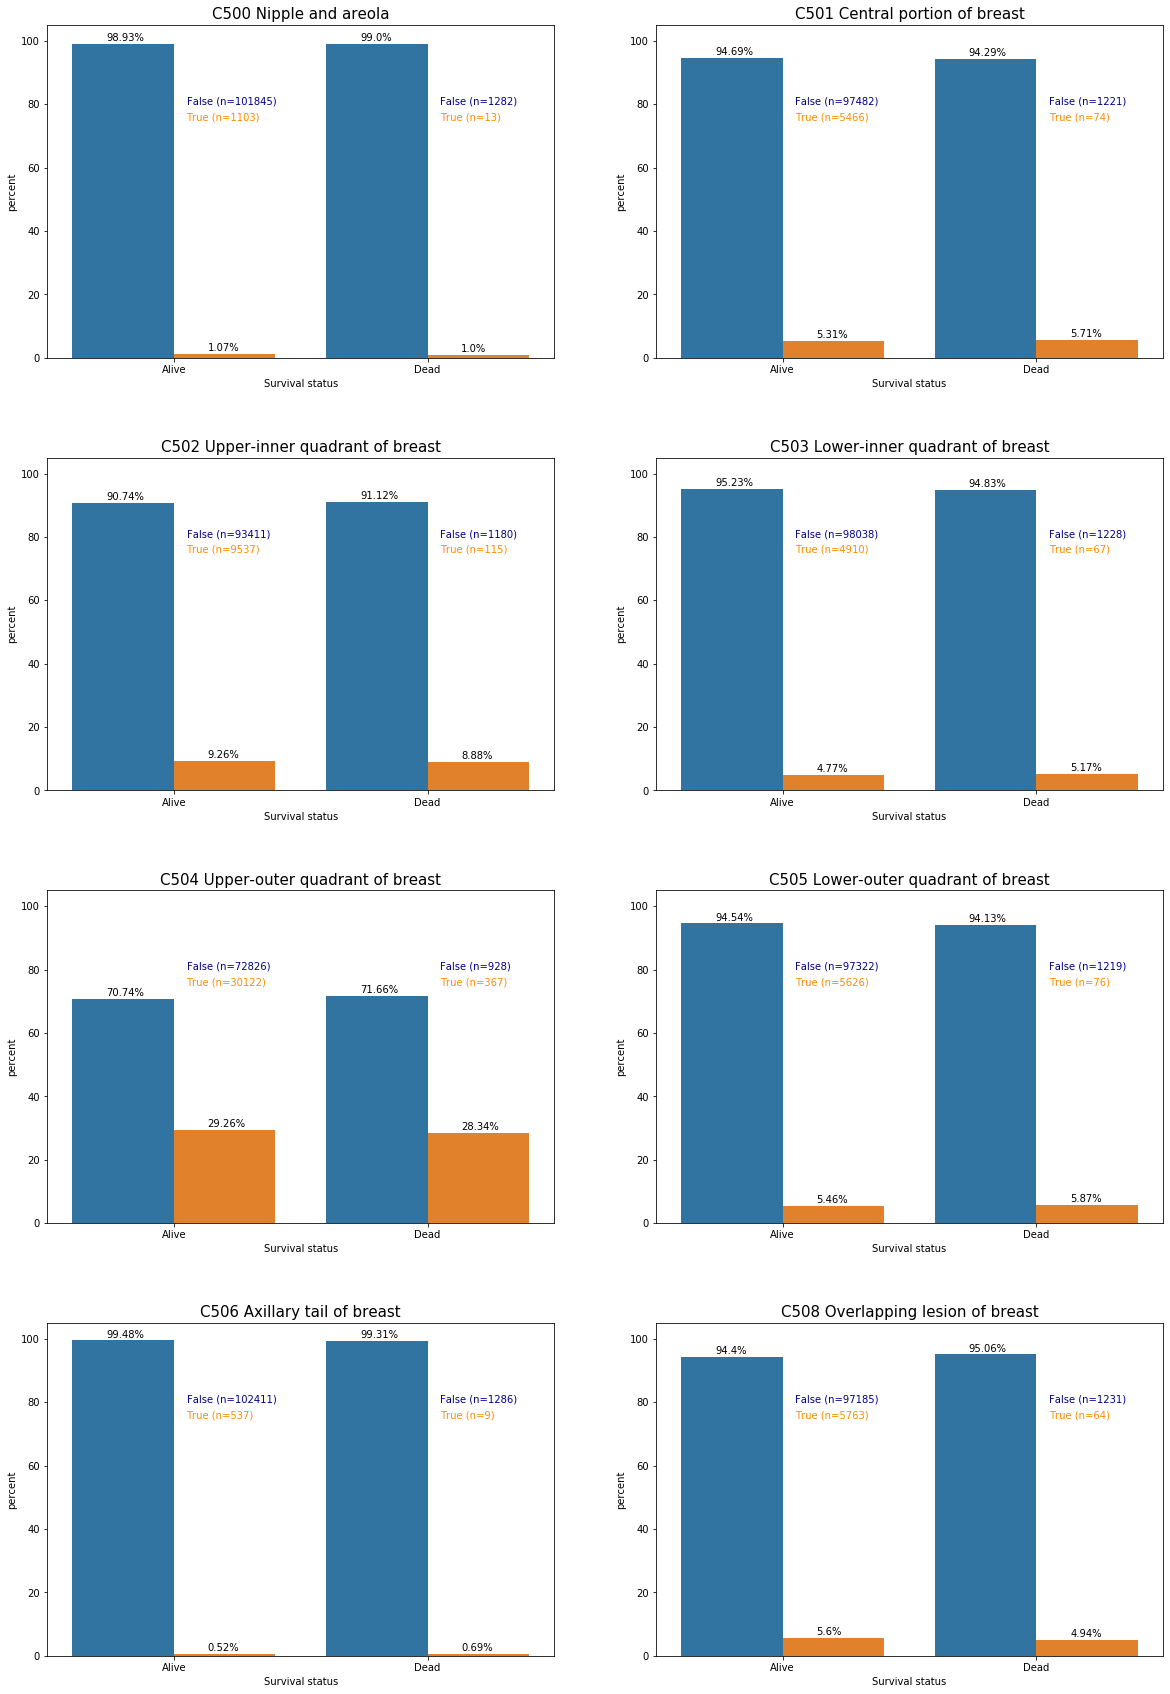

In [447]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))
plt.subplots_adjust(hspace=0.3)

#Figure 1
x, y = 'DEAD', 'SC500'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('C500 Nipple and areola', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=101845)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=1103)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1282)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=13)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'SC501'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('C501 Central portion of breast', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=97482)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=5466)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1221)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=74)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'SC502'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('C502 Upper-inner quadrant of breast', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=93411)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=9537)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1180)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=115)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'SC503'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('C503 Lower-inner quadrant of breast', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=98038)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=4910)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1228)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=67)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'SC504'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('C504 Upper-outer quadrant of breast', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=72826)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=30122)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=928)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=367)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'SC505'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('C505 Lower-outer quadrant of breast', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=97322)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=5626)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1219)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=76)", horizontalalignment='left', size='medium', color='darkorange')    
    
#Figure 7
x, y = 'DEAD', 'SC506'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('C506 Axillary tail of breast', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=102411)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=537)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1286)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=9)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 8
x, y = 'DEAD', 'SC508'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set_title('C508 Overlapping lesion of breast', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 80, "False (n=97185)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 75, "True (n=5763)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.show()

In [448]:
contingency = pd.crosstab(df['DEAD'], df['SC500'])
contingency

SC500,False,True
DEAD,,
0,101845,1103
1,1282,13


In [449]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9212255100512233


In [450]:
contingency = pd.crosstab(df['DEAD'], df['SC501'])
contingency

SC501,False,True
DEAD,,
0,97482,5466
1,1221,74


In [451]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5598756692611544


In [452]:
contingency = pd.crosstab(df['DEAD'], df['SC502'])
contingency

SC502,False,True
DEAD,,
0,93411,9537
1,1180,115


In [453]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6708163414186883


In [454]:
contingency = pd.crosstab(df['DEAD'], df['SC503'])
contingency

SC503,False,True
DEAD,,
0,98038,4910
1,1228,67


In [455]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.540142723519039


In [456]:
contingency = pd.crosstab(df['DEAD'], df['SC504'])
contingency

SC504,False,True
DEAD,,
0,72826,30122
1,928,367


In [457]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4887775510254665


In [458]:
contingency = pd.crosstab(df['DEAD'], df['SC505'])
contingency

SC505,False,True
DEAD,,
0,97322,5626
1,1219,76


In [459]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5662261771050705


In [460]:
contingency = pd.crosstab(df['DEAD'], df['SC506'])
contingency

SC506,False,True
DEAD,,
0,102411,537
1,1286,9


In [461]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5059323127962025


In [462]:
contingency = pd.crosstab(df['DEAD'], df['SC508'])
contingency

SC508,False,True
DEAD,,
0,97185,5763
1,1231,64


In [463]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3369675333288255


In [464]:
df.groupby('DEAD')['BEH_BENIGN'].value_counts()

DEAD  BEH_BENIGN
0     False         102932
      True              16
1     False           1295
Name: BEH_BENIGN, dtype: int64

In [465]:
df.groupby('DEAD')['BEH_MALIG'].value_counts()

DEAD  BEH_MALIG
0     True         102090
      False           858
1     True           1288
      False             7
Name: BEH_MALIG, dtype: int64

In [466]:
df.groupby('DEAD')['BEH_MICINV'].value_counts()

DEAD  BEH_MICINV
0     False         102314
      True             634
1     False           1290
      True               5
Name: BEH_MICINV, dtype: int64

In [467]:
df.groupby('DEAD')['BEH_INSITU'].value_counts()

DEAD  BEH_INSITU
0     False         102469
      True             479
1     False           1293
      True               2
Name: BEH_INSITU, dtype: int64

In [468]:
df.groupby('DEAD')['BEH_UNCERT'].value_counts()

DEAD  BEH_UNCERT
0     False         102906
      True              42
1     False           1295
Name: BEH_UNCERT, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


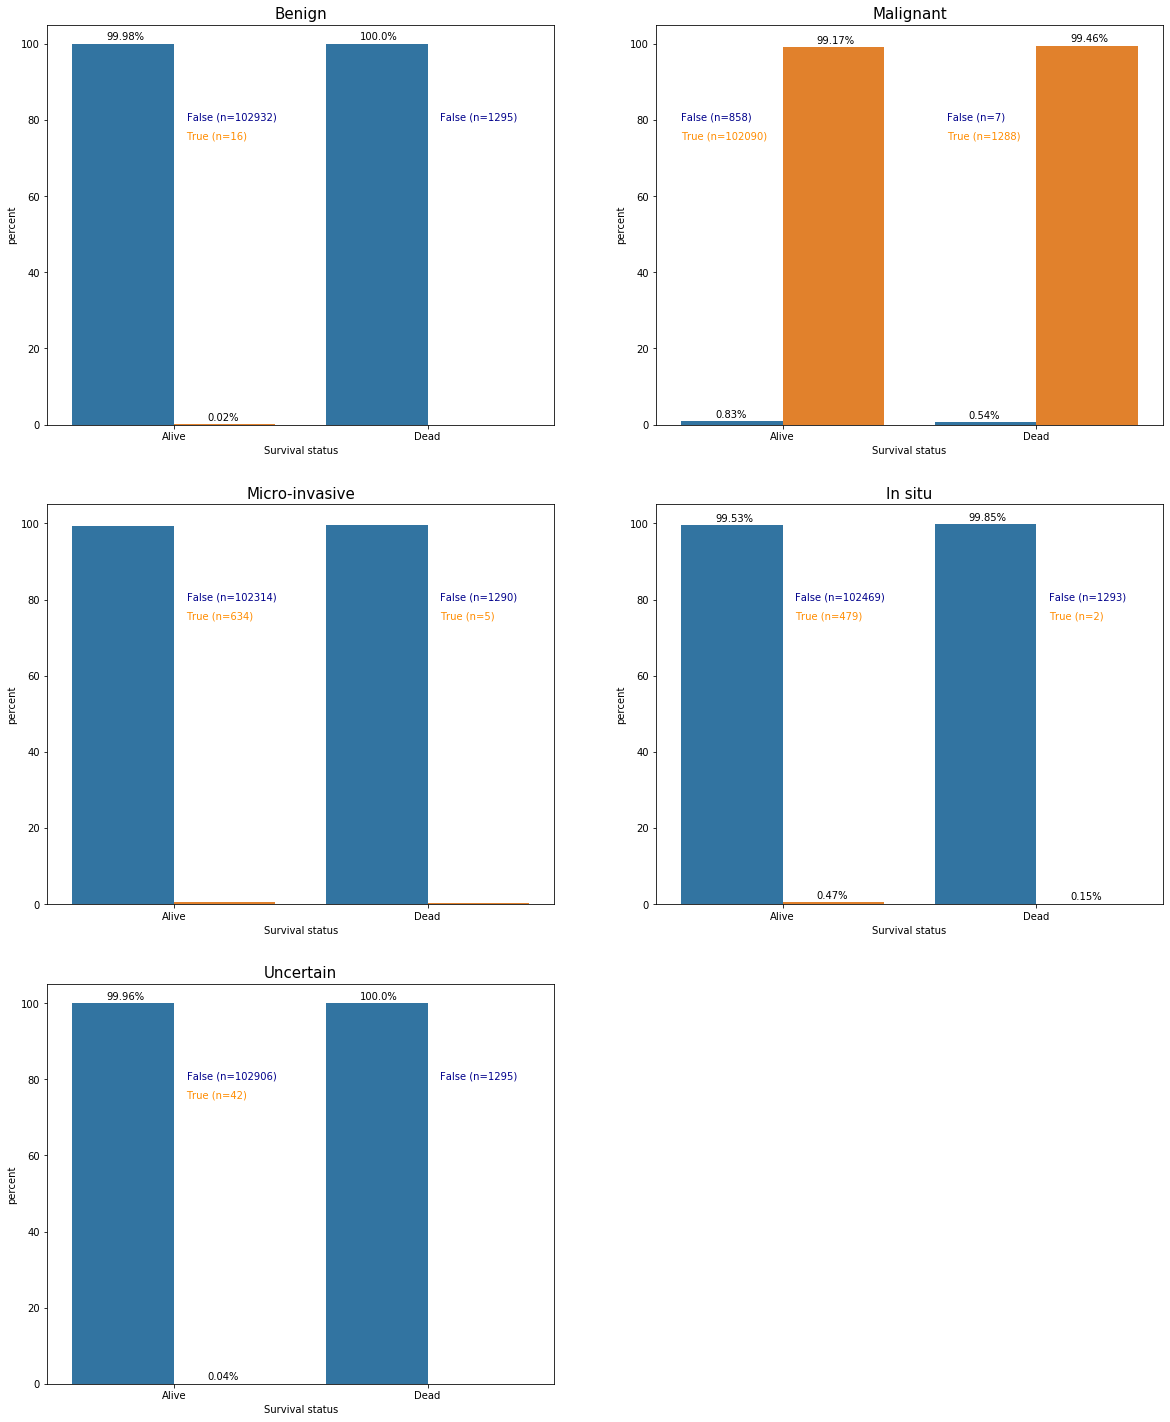

In [469]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'BEH_BENIGN'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Benign', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)

axes[0,0].text(0.05, 80, "False (n=102932)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=16)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')


#Figure 2
x, y = 'DEAD', 'BEH_MALIG'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Malignant', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)
    
axes[0,1].text(-0.4, 80, "False (n=858)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(-0.4, 75, "True (n=102090)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(0.65, 80, "False (n=7)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.65, 75, "True (n=1288)", horizontalalignment='left', size='medium', color='darkorange')    

#Figure 3
x, y = 'DEAD', 'BEH_MICINV'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Micro-invasive', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
axes[1,0].text(0.05, 80, "False (n=102314)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=634)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1290)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=5)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'BEH_INSITU'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('In situ', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102469)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=479)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1293)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=2)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'BEH_UNCERT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Uncertain', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=102906)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=42)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')   
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [470]:
contingency = pd.crosstab(df['DEAD'], df['BEH_BENIGN'])
contingency

BEH_BENIGN,False,True
DEAD,,
0,102932,16
1,1295,0


In [471]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.49653323038073915


In [472]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MALIG'])
contingency

BEH_MALIG,False,True
DEAD,,
0,858,102090
1,7,1288


In [473]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.31705768886386354


In [474]:
contingency = pd.crosstab(df['DEAD'], df['BEH_MICINV'])
contingency

BEH_MICINV,False,True
DEAD,,
0,102314,634
1,1290,5


In [475]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3823908961247944


In [476]:
contingency = pd.crosstab(df['DEAD'], df['BEH_INSITU'])
contingency

BEH_INSITU,False,True
DEAD,,
0,102469,479
1,1293,2


In [477]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1515797041631373


In [478]:
contingency = pd.crosstab(df['DEAD'], df['BEH_UNCERT'])
contingency

BEH_UNCERT,False,True
DEAD,,
0,102906,42
1,1295,0


In [479]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9758102533395924


In [480]:
df.groupby('DEAD')['T0'].value_counts()

DEAD  T0   
0     False    102865
      True         83
1     False      1295
Name: T0, dtype: int64

In [481]:
df.groupby('DEAD')['T1'].value_counts()

DEAD  T1   
0     False    51550
      True     51398
1     False     1034
      True       261
Name: T1, dtype: int64

In [482]:
df.groupby('DEAD')['T2'].value_counts()

DEAD  T2   
0     False    67468
      True     35480
1     False      919
      True       376
Name: T2, dtype: int64

In [483]:
df.groupby('DEAD')['T3'].value_counts()

DEAD  T3   
0     False    97548
      True      5400
1     False     1196
      True        99
Name: T3, dtype: int64

In [484]:
df.groupby('DEAD')['T4'].value_counts()

DEAD  T4   
0     False    100208
      True       2740
1     False      1178
      True        117
Name: T4, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


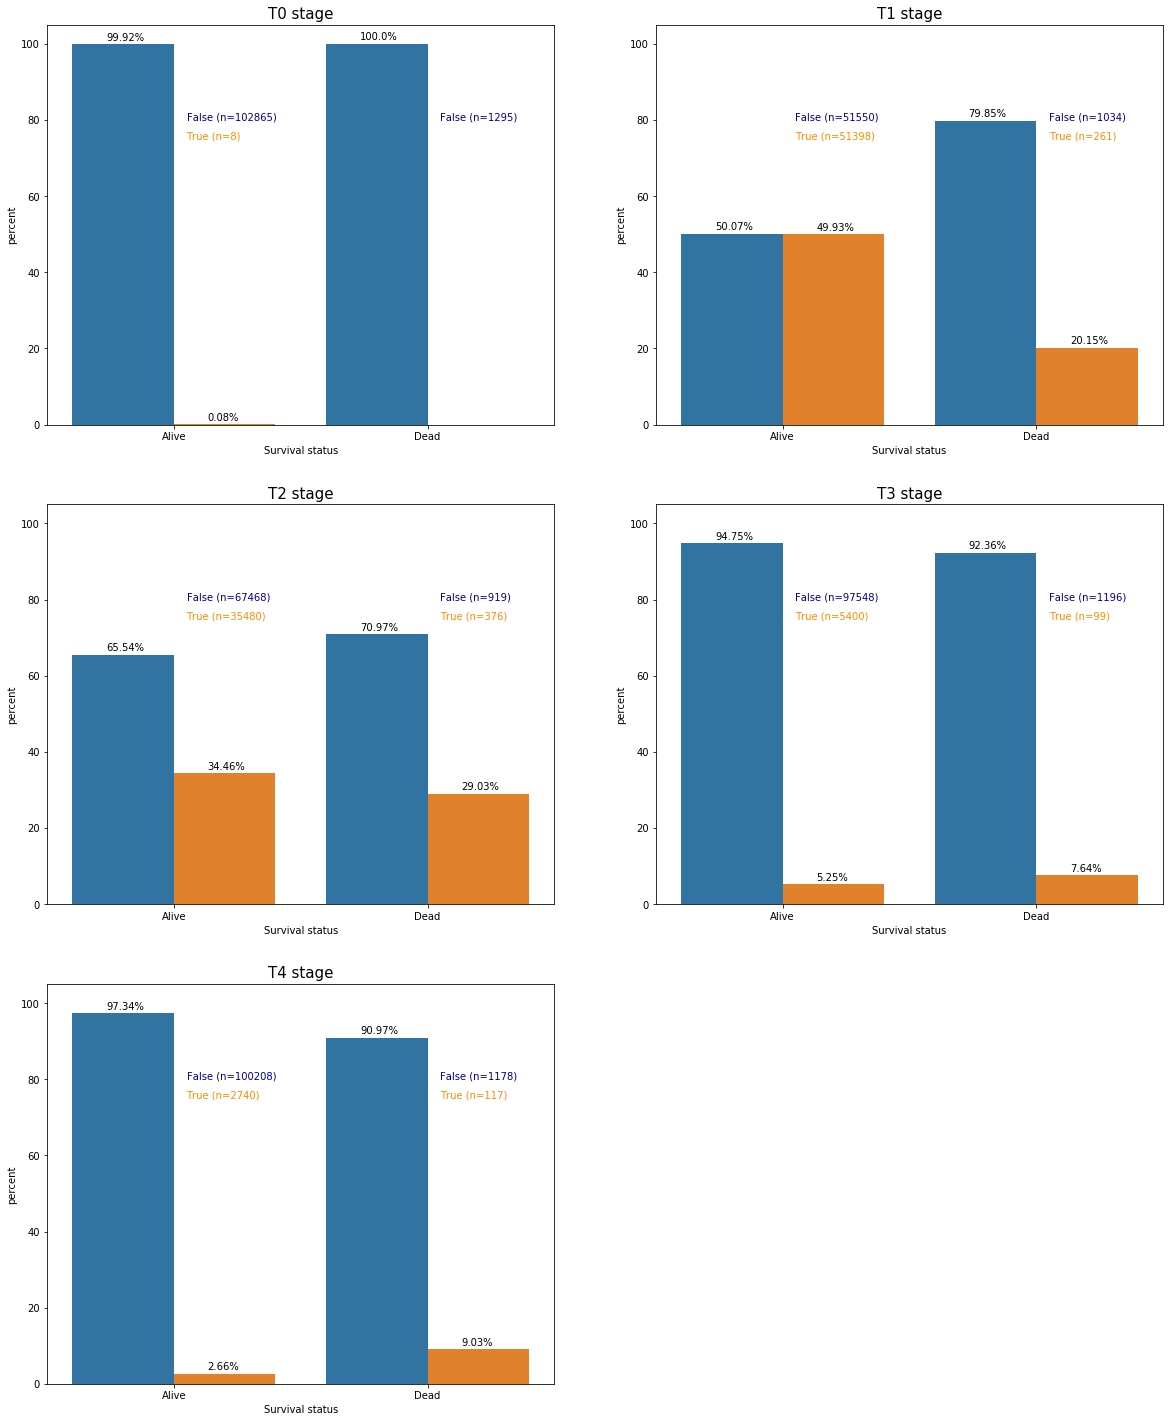

In [485]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'T0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('T0 stage', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=102865)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=8)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')

#Figure 2
x, y = 'DEAD', 'T1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('T1 stage', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=51550)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=51398)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1034)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=261)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'T2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('T2 stage', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=67468)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=35480)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=919)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=376)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'T3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('T3 stage', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=97548)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=5400)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1196)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=99)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'T4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('T4 stage', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=100208)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=2740)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1178)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=117)", horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [486]:
contingency = pd.crosstab(df['DEAD'], df['T0'])
contingency

T0,False,True
DEAD,,
0,102865,83
1,1295,0


In [487]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.598528018323798


In [488]:
contingency = pd.crosstab(df['DEAD'], df['T1'])
contingency

T1,False,True
DEAD,,
0,51550,51398
1,1034,261


In [489]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

2.3076172581276585e-100


In [490]:
contingency = pd.crosstab(df['DEAD'], df['T2'])
contingency

T2,False,True
DEAD,,
0,67468,35480
1,919,376


In [491]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

4.951669440970897e-05


In [492]:
contingency = pd.crosstab(df['DEAD'], df['T3'])
contingency

T3,False,True
DEAD,,
0,97548,5400
1,1196,99


In [493]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0001593116463297265


In [494]:
contingency = pd.crosstab(df['DEAD'], df['T4'])
contingency

T4,False,True
DEAD,,
0,100208,2740
1,1178,117


In [495]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

9.075191975387794e-44


In [496]:
df.groupby('DEAD')['N0'].value_counts()

DEAD  N0   
0     True     63555
      False    39393
1     False      922
      True       373
Name: N0, dtype: int64

In [497]:
df.groupby('DEAD')['N1'].value_counts()

DEAD  N1   
0     False    79249
      True     23699
1     False      984
      True       311
Name: N1, dtype: int64

In [498]:
df.groupby('DEAD')['N2'].value_counts()

DEAD  N2   
0     False    98596
      True      4352
1     False     1228
      True        67
Name: N2, dtype: int64

In [499]:
df.groupby('DEAD')['N3'].value_counts()

DEAD  N3   
0     False    100894
      True       2054
1     False      1228
      True         67
Name: N3, dtype: int64

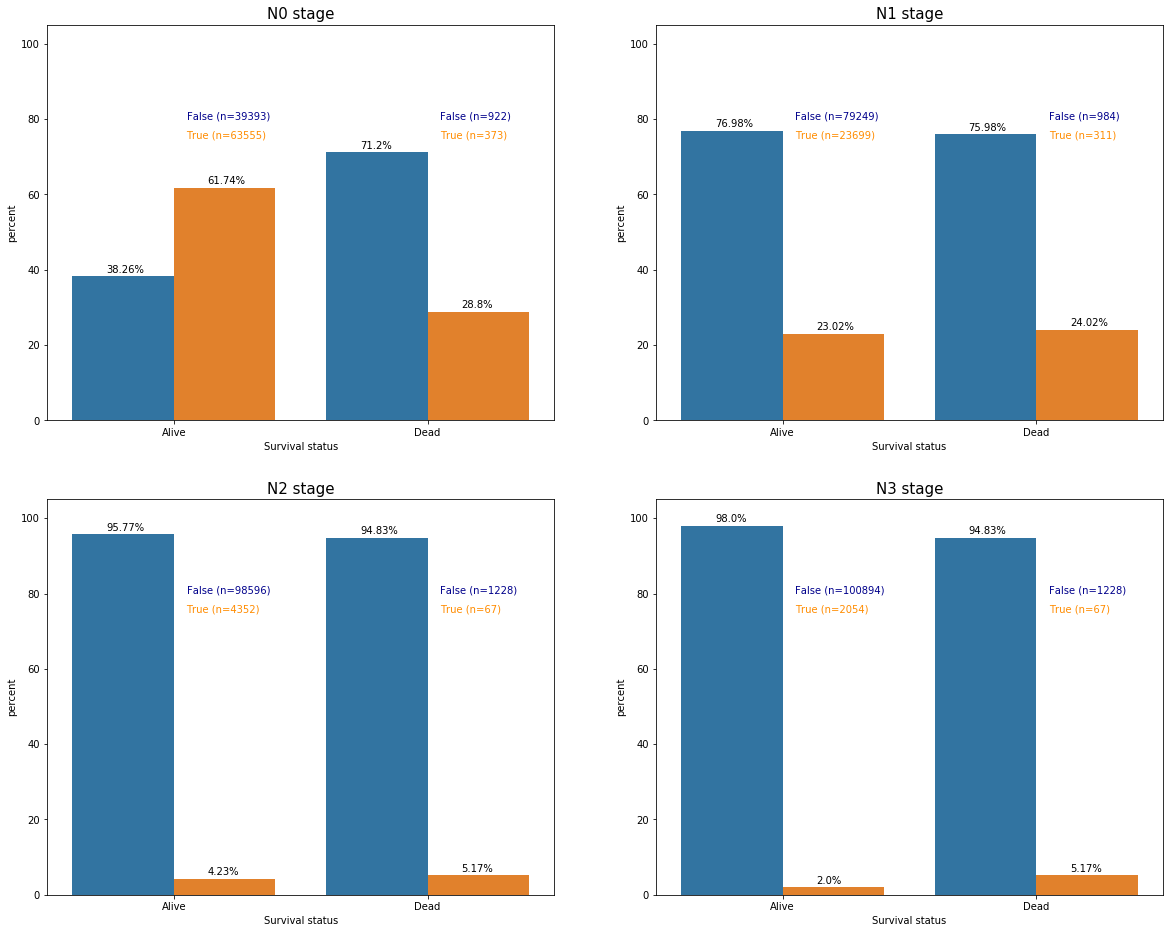

In [500]:
f, axes = plt.subplots(2, 2, figsize=(20, 16))

#Figure 1
x, y = 'DEAD', 'N0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('N0 stage', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=39393)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=63555)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=922)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=373)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'N1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('N1 stage', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=79249)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=23699)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=984)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=311)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'N2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('N2 stage', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=98596)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=4352)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1228)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=67)", horizontalalignment='left', size='medium', color='darkorange')
    
#Figure 4
x, y = 'DEAD', 'N3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('N3 stage', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=100894)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=2054)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1228)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=67)", horizontalalignment='left', size='medium', color='darkorange')

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [501]:
contingency = pd.crosstab(df['DEAD'], df['N0'])
contingency

N0,False,True
DEAD,,
0,39393,63555
1,922,373


In [502]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

6.768288692568229e-129


In [503]:
contingency = pd.crosstab(df['DEAD'], df['N1'])
contingency

N1,False,True
DEAD,,
0,79249,23699
1,984,311


In [504]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4168009270200468


In [505]:
contingency = pd.crosstab(df['DEAD'], df['N2'])
contingency

N2,False,True
DEAD,,
0,98596,4352
1,1228,67


In [506]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.10731719093087087


In [507]:
contingency = pd.crosstab(df['DEAD'], df['N3'])
contingency

N3,False,True
DEAD,,
0,100894,2054
1,1228,67


In [508]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.8306599016538596e-15


In [509]:
df.groupby('DEAD')['M1'].value_counts()

DEAD  M1   
0     False    99956
      True      2992
1     False     1016
      True       279
Name: M1, dtype: int64

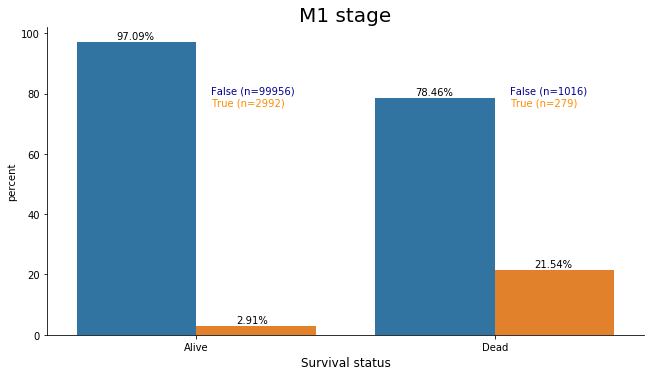

In [510]:
x, y = 'DEAD', 'M1'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('M1 stage', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=99956)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=2992)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=1016)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=279)", horizontalalignment='left', size='medium', color='darkorange');

In [511]:
contingency = pd.crosstab(df['DEAD'], df['M1'])
contingency

M1,False,True
DEAD,,
0,99956,2992
1,1016,279


In [512]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [513]:
df.groupby('DEAD')['STAGE0'].value_counts()

DEAD  STAGE0
0     False     102014
      True         934
1     False       1287
      True           8
Name: STAGE0, dtype: int64

In [514]:
df.groupby('DEAD')['STAGE1'].value_counts()

DEAD  STAGE1
0     False     59487
      True      43461
1     False      1142
      True        153
Name: STAGE1, dtype: int64

In [515]:
df.groupby('DEAD')['STAGE2'].value_counts()

DEAD  STAGE2
0     False     64172
      True      38776
1     False       979
      True        316
Name: STAGE2, dtype: int64

In [516]:
df.groupby('DEAD')['STAGE3'].value_counts()

DEAD  STAGE3
0     False     94288
      True       8660
1     False      1150
      True        145
Name: STAGE3, dtype: int64

In [517]:
df.groupby('DEAD')['STAGE4'].value_counts()

DEAD  STAGE4
0     False     99775
      True       3173
1     False       999
      True        296
Name: STAGE4, dtype: int64

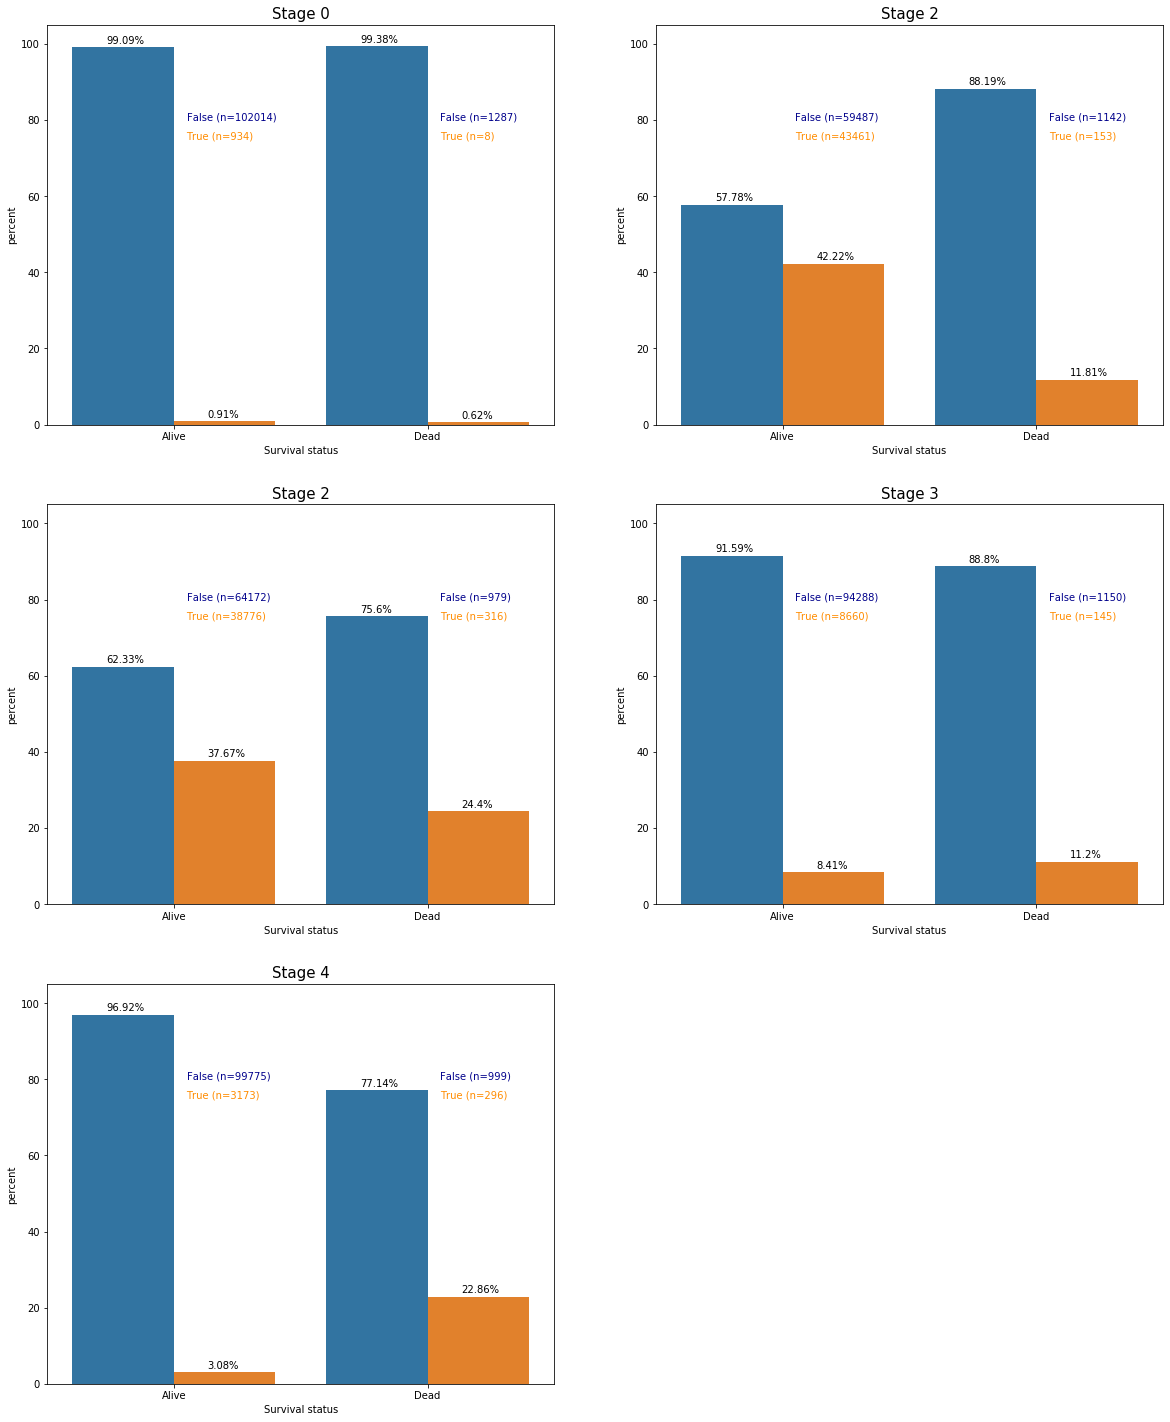

In [518]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'STAGE0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Stage 0', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=102014)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=934)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1287)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=8)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'STAGE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Stage 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=59487)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=43461)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1142)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=153)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'STAGE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Stage 2', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=64172)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=38776)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=979)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=316)", horizontalalignment='left', size='medium', color='darkorange')
    
#Figure 4
x, y = 'DEAD', 'STAGE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Stage 3', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=94288)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=8660)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1150)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=145)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'STAGE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Stage 4', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=99775)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=3173)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=999)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=296)", horizontalalignment='left', size='medium', color='darkorange')
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [519]:
contingency = pd.crosstab(df['DEAD'], df['STAGE0'])
contingency

STAGE0,False,True
DEAD,,
0,102014,934
1,1287,8


In [520]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3440053012456141


In [521]:
contingency = pd.crosstab(df['DEAD'], df['STAGE1'])
contingency

STAGE1,False,True
DEAD,,
0,59487,43461
1,1142,153


In [522]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

2.222903702737885e-107


In [523]:
contingency = pd.crosstab(df['DEAD'], df['STAGE2'])
contingency

STAGE2,False,True
DEAD,,
0,64172,38776
1,979,316


In [524]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

1.5269523794650482e-22


In [525]:
contingency = pd.crosstab(df['DEAD'], df['STAGE3'])
contingency

STAGE3,False,True
DEAD,,
0,94288,8660
1,1150,145


In [526]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.00041382138538526784


In [527]:
contingency = pd.crosstab(df['DEAD'], df['STAGE4'])
contingency

STAGE4,False,True
DEAD,,
0,99775,3173
1,999,296


In [528]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.0


In [529]:
df.groupby('DEAD')['GRADE1'].value_counts()

DEAD  GRADE1
0     False     87654
      True      15294
1     False      1099
      True        196
Name: GRADE1, dtype: int64

In [530]:
df.groupby('DEAD')['GRADE2'].value_counts()

DEAD  GRADE2
0     True      51968
      False     50980
1     False       680
      True        615
Name: GRADE2, dtype: int64

In [531]:
df.groupby('DEAD')['GRADE3'].value_counts()

DEAD  GRADE3
0     False     72229
      True      30719
1     False       903
      True        392
Name: GRADE3, dtype: int64

In [532]:
df.groupby('DEAD')['GRADE4'].value_counts()

DEAD  GRADE4
0     False     102892
      True          56
1     False       1295
Name: GRADE4, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


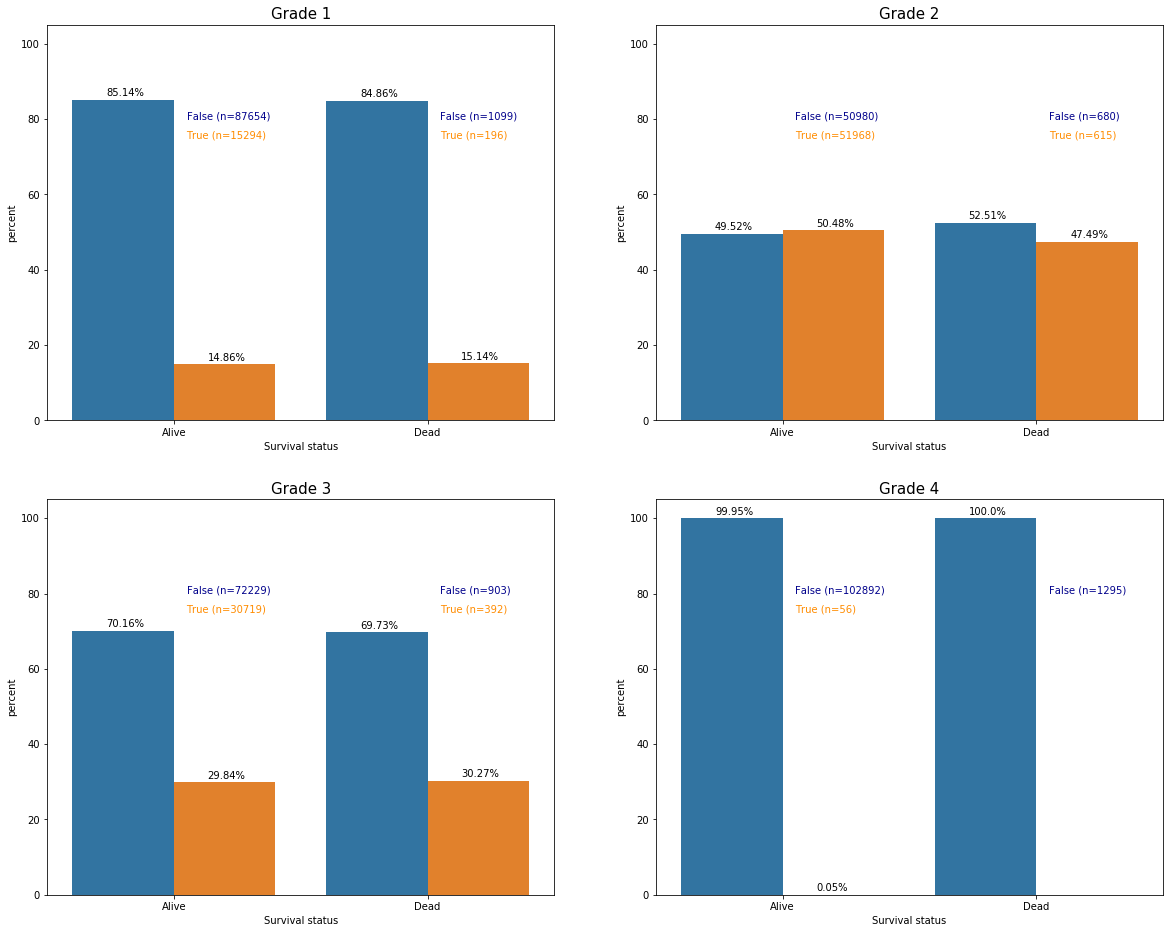

In [533]:
f, axes = plt.subplots(2, 2, figsize=(20, 16))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'GRADE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Grade 1', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=87654)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=15294)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1099)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=196)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'GRADE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Grade 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=50980)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=51968)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=680)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=615)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'GRADE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Grade 3', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=72229)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=30719)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=903)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=392)", horizontalalignment='left', size='medium', color='darkorange')               

#Figure 4
x, y = 'DEAD', 'GRADE4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Grade 4', fontsize=15)               
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()               
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102892)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=56)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')
    
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [534]:
contingency = pd.crosstab(df['DEAD'], df['GRADE1'])
contingency

GRADE1,False,True
DEAD,,
0,87654,15294
1,1099,196


In [535]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8093243353132229


In [536]:
contingency = pd.crosstab(df['DEAD'], df['GRADE2'])
contingency

GRADE2,False,True
DEAD,,
0,50980,51968
1,680,615


In [537]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.034830145459824276


In [538]:
contingency = pd.crosstab(df['DEAD'], df['GRADE3'])
contingency

GRADE3,False,True
DEAD,,
0,72229,30719
1,903,392


In [539]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7594211555540775


In [540]:
contingency = pd.crosstab(df['DEAD'], df['GRADE4'])
contingency

GRADE4,False,True
DEAD,,
0,102892,56
1,1295,0


In [541]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8133208701402136


In [542]:
df.groupby('DEAD')['AGE_MEAN'].describe()

,count,mean,std,min,25%,50%,75%,max
DEAD,,,,,,,,
0,102948.0,62.935087,14.236843,3.0,52.0,63.0,73.0,105.0
1,1295.0,64.923938,15.223940,17.0,51.0,66.0,77.0,93.0


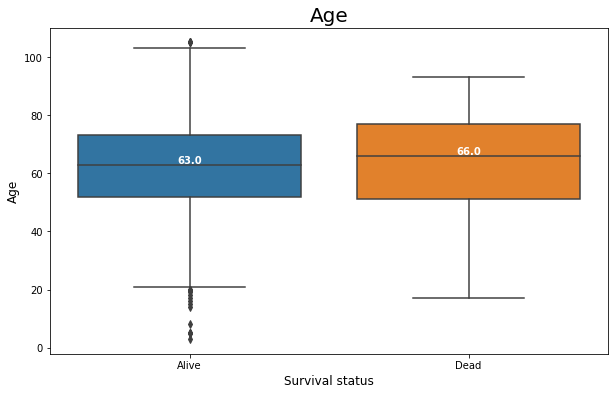

In [543]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'AGE_MEAN')

medians = df.groupby(['DEAD'])['AGE_MEAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_title('Age', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [544]:
df.groupby('DEAD')['L0801'].value_counts()

DEAD  L0801
0     False    80976
      True     21972
1     False     1022
      True       273
Name: L0801, dtype: int64

In [545]:
df.groupby('DEAD')['L0201'].value_counts()

DEAD  L0201
0     False    90010
      True     12938
1     False     1118
      True       177
Name: L0201, dtype: int64

In [546]:
df.groupby('DEAD')['L0301'].value_counts()

DEAD  L0301
0     False    92850
      True     10098
1     False     1175
      True       120
Name: L0301, dtype: int64

In [547]:
df.groupby('DEAD')['L1201'].value_counts()

DEAD  L1201
0     False    92022
      True     10926
1     False     1150
      True       145
Name: L1201, dtype: int64

In [548]:
df.groupby('DEAD')['L0401'].value_counts()

DEAD  L0401
0     False    90968
      True     11980
1     False     1152
      True       143
Name: L0401, dtype: int64

In [549]:
df.groupby('DEAD')['L1701'].value_counts()

DEAD  L1701
0     False    89935
      True     13013
1     False     1135
      True       160
Name: L1701, dtype: int64

In [550]:
df.groupby('DEAD')['L1001'].value_counts()

DEAD  L1001
0     False    86853
      True     16095
1     False     1082
      True       213
Name: L1001, dtype: int64

In [551]:
df.groupby('DEAD')['L0901'].value_counts()

DEAD  L0901
0     False    97002
      True      5946
1     False     1231
      True        64
Name: L0901, dtype: int64

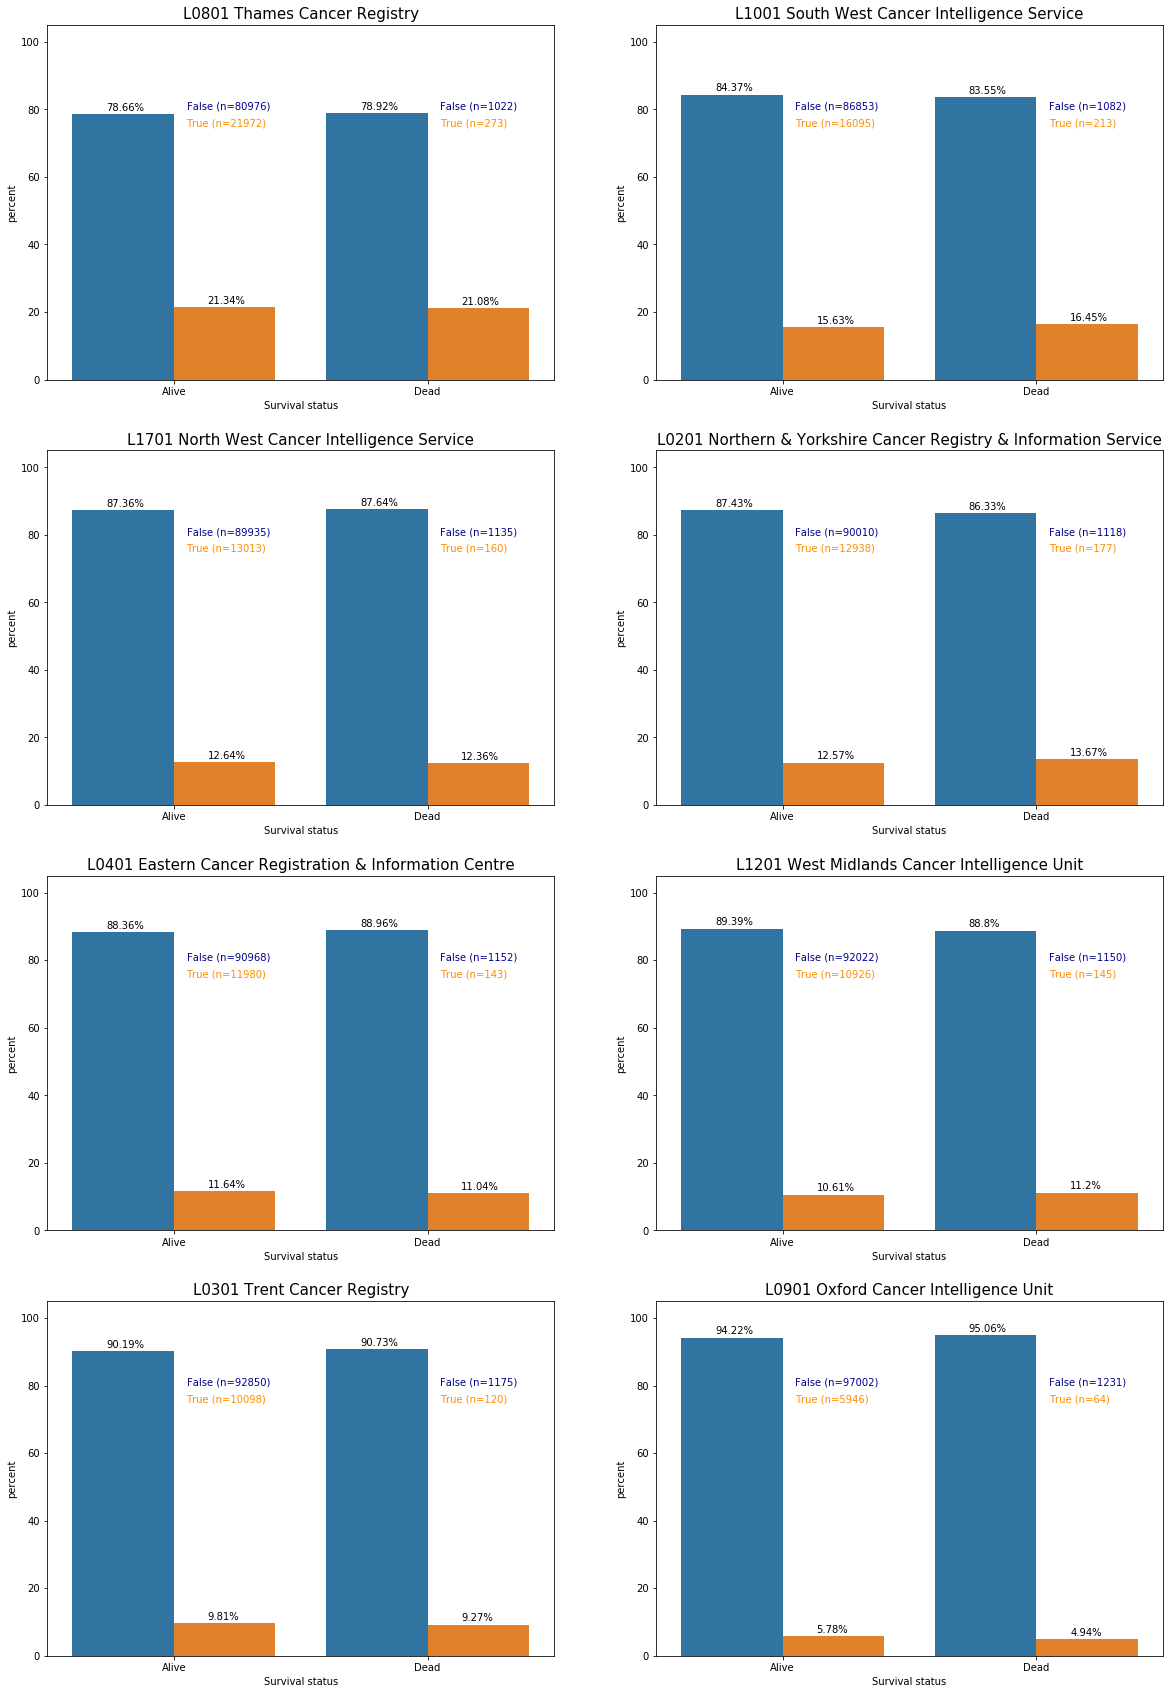

In [552]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'L0801'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('L0801 Thames Cancer Registry', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=80976)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=21972)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1022)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=273)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'L1001'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('L1001 South West Cancer Intelligence Service', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=86853)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=16095)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1082)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=213)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'L1701'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('L1701 North West Cancer Intelligence Service', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=89935)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=13013)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1135)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=160)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'L0201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('L0201 Northern & Yorkshire Cancer Registry & Information Service', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=90010)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=12938)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1118)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=177)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 5
x, y = 'DEAD', 'L0401'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('L0401 Eastern Cancer Registration & Information Centre', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=90968)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=11980)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1152)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=143)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 6
x, y = 'DEAD', 'L1201'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('L1201 West Midlands Cancer Intelligence Unit', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=92022)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=10926)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1150)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=145)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 7
x, y = 'DEAD', 'L0301'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('L0301 Trent Cancer Registry', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=92850)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=10098)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1175)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=120)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 8
x, y = 'DEAD', 'L0901'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set_title('L0901 Oxford Cancer Intelligence Unit', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 80, "False (n=97002)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 75, "True (n=5946)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 80, "False (n=1231)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 75, "True (n=64)", horizontalalignment='left', size='medium', color='darkorange')  
    
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.show()

In [553]:
contingency = pd.crosstab(df['DEAD'], df['L0801'])
contingency

L0801,False,True
DEAD,,
0,80976,21972
1,1022,273


In [554]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8459150312629261


In [555]:
contingency = pd.crosstab(df['DEAD'], df['L1001'])
contingency

L1001,False,True
DEAD,,
0,86853,16095
1,1082,213


In [556]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4456932469278797


In [557]:
contingency = pd.crosstab(df['DEAD'], df['L1701'])
contingency

L1701,False,True
DEAD,,
0,89935,13013
1,1135,160


In [558]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7911401373375498


In [559]:
contingency = pd.crosstab(df['DEAD'], df['L0201'])
contingency

L0201,False,True
DEAD,,
0,90010,12938
1,1118,177


In [560]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2524171137885651


In [561]:
contingency = pd.crosstab(df['DEAD'], df['L0401'])
contingency

L0401,False,True
DEAD,,
0,90968,11980
1,1152,143


In [562]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5355577142976363


In [563]:
contingency = pd.crosstab(df['DEAD'], df['L1201'])
contingency

L1201,False,True
DEAD,,
0,92022,10926
1,1150,145


In [564]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.527231097926147


In [565]:
contingency = pd.crosstab(df['DEAD'], df['L0301'])
contingency

L0301,False,True
DEAD,,
0,92850,10098
1,1175,120


In [566]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5449377537906794


In [567]:
contingency = pd.crosstab(df['DEAD'], df['L0901'])
contingency

L0901,False,True
DEAD,,
0,97002,5946
1,1231,64


In [568]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.22282362977772993


In [569]:
df.groupby('DEAD')['ER_POS'].value_counts()

DEAD  ER_POS
0     True      67843
      False     35105
1     True        819
      False       476
Name: ER_POS, dtype: int64

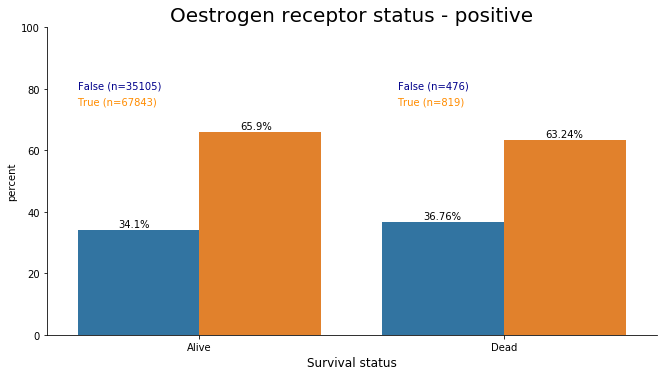

In [570]:
x, y = 'DEAD', 'ER_POS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Oestrogen receptor status - positive', fontsize=20)
ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(-0.4, 80, "False (n=35105)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(-0.4, 75, "True (n=67843)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(0.65, 80, "False (n=476)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.65, 75, "True (n=819)", horizontalalignment='left', size='medium', color='darkorange');

In [571]:
contingency = pd.crosstab(df['DEAD'], df['ER_POS'])
contingency

ER_POS,False,True
DEAD,,
0,35105,67843
1,476,819


In [572]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.04832520095141168


In [573]:
df.groupby('DEAD')['PR_POS'].value_counts()

DEAD  PR_POS
0     False     68896
      True      34052
1     False       864
      True        431
Name: PR_POS, dtype: int64

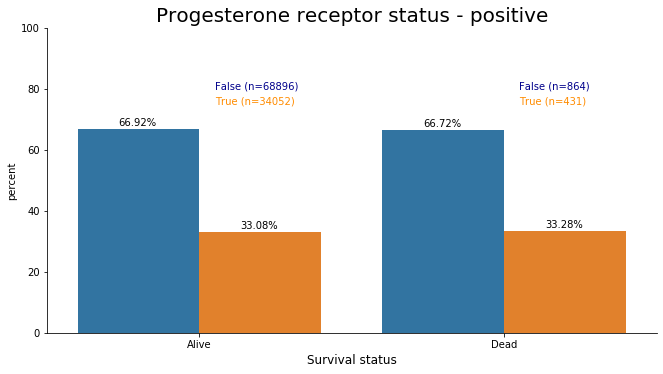

In [574]:
x, y = 'DEAD', 'PR_POS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Progesterone receptor status - positive', fontsize=20)
ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=68896)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 75, "True (n=34052)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=864)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 75, "True (n=431)", horizontalalignment='left', size='medium', color='darkorange');

In [575]:
contingency = pd.crosstab(df['DEAD'], df['PR_POS'])
contingency

PR_POS,False,True
DEAD,,
0,68896,34052
1,864,431


In [576]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8996758500516816


In [577]:
df.groupby('DEAD')['HER_POS'].value_counts()

DEAD  HER_POS
0     False      91556
      True       11392
1     False       1179
      True         116
Name: HER_POS, dtype: int64

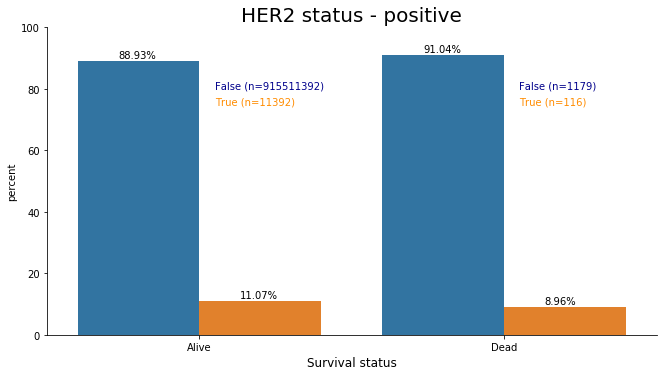

In [578]:
x, y = 'DEAD', 'HER_POS'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('HER2 status - positive', fontsize=20)
ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
ax.ax.set_ylim(0, 100)
plt.gcf().set_size_inches(10,5)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=915511392)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 75, "True (n=11392)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=1179)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 75, "True (n=116)", horizontalalignment='left', size='medium', color='darkorange');

In [579]:
contingency = pd.crosstab(df['DEAD'], df['HER_POS'])
contingency

HER_POS,False,True
DEAD,,
0,91556,11392
1,1179,116


In [580]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.018214298815341663


In [581]:
df.groupby('DEAD')['CURATIVE_TREAT'].value_counts()

DEAD  CURATIVE_TREAT
0     False             58113
      True              44835
1     False               757
      True                538
Name: CURATIVE_TREAT, dtype: int64

In [582]:
df.groupby('DEAD')['NONCURATIVE_TREAT'].value_counts()

DEAD  NONCURATIVE_TREAT
0     False                101218
      True                   1730
1     False                  1276
      True                     19
Name: NONCURATIVE_TREAT, dtype: int64

In [583]:
df.groupby('DEAD')['NO_ACTIVE_TREAT'].value_counts()

DEAD  NO_ACTIVE_TREAT
0     False              102755
      True                  193
1     False                1293
      True                    2
Name: NO_ACTIVE_TREAT, dtype: int64

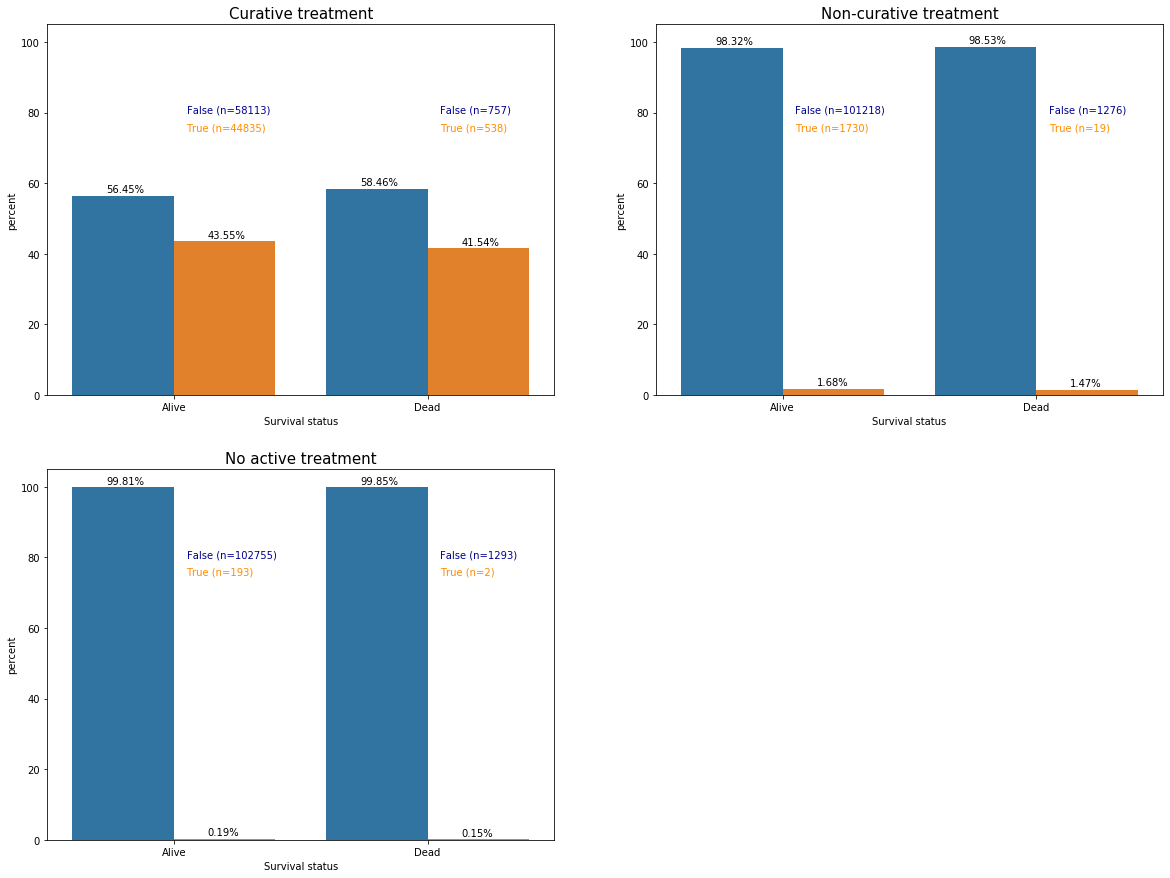

In [584]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Curative treatment', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=58113)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=44835)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=757)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=538)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'NONCURATIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Non-curative treatment', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=101218)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=1730)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=1276)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=19)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'NO_ACTIVE_TREAT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('No active treatment', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=102755)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=193)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1293)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=2)", horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
f.delaxes(ax = axes[1,1]) 
plt.show()

In [585]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE_TREAT'])
contingency

CURATIVE_TREAT,False,True
DEAD,,
0,58113,44835
1,757,538


In [586]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1558233331371869


In [587]:
contingency = pd.crosstab(df['DEAD'], df['NONCURATIVE_TREAT'])
contingency

NONCURATIVE_TREAT,False,True
DEAD,,
0,101218,1730
1,1276,19


In [588]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6276867862280942


In [591]:
contingency = pd.crosstab(df['DEAD'], df['NO_ACTIVE_TREAT'])
contingency

NO_ACTIVE_TREAT,False,True
DEAD,,
0,102755,193
1,1293,2


In [592]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9599825866907236


In [593]:
df.groupby('DEAD')['ECOG0'].value_counts()

DEAD  ECOG0
0     False    82591
      True     20357
1     False     1074
      True       221
Name: ECOG0, dtype: int64

In [594]:
df.groupby('DEAD')['ECOG1'].value_counts()

DEAD  ECOG1
0     False    100012
      True       2936
1     False      1260
      True         35
Name: ECOG1, dtype: int64

In [595]:
df.groupby('DEAD')['ECOG2'].value_counts()

DEAD  ECOG2
0     False    101867
      True       1081
1     False      1278
      True         17
Name: ECOG2, dtype: int64

In [596]:
df.groupby('DEAD')['ECOG3'].value_counts()

DEAD  ECOG3
0     False    102128
      True        820
1     False      1288
      True          7
Name: ECOG3, dtype: int64

In [597]:
df.groupby('DEAD')['ECOG4'].value_counts()

DEAD  ECOG4
0     False    102683
      True        265
1     False      1291
      True          4
Name: ECOG4, dtype: int64

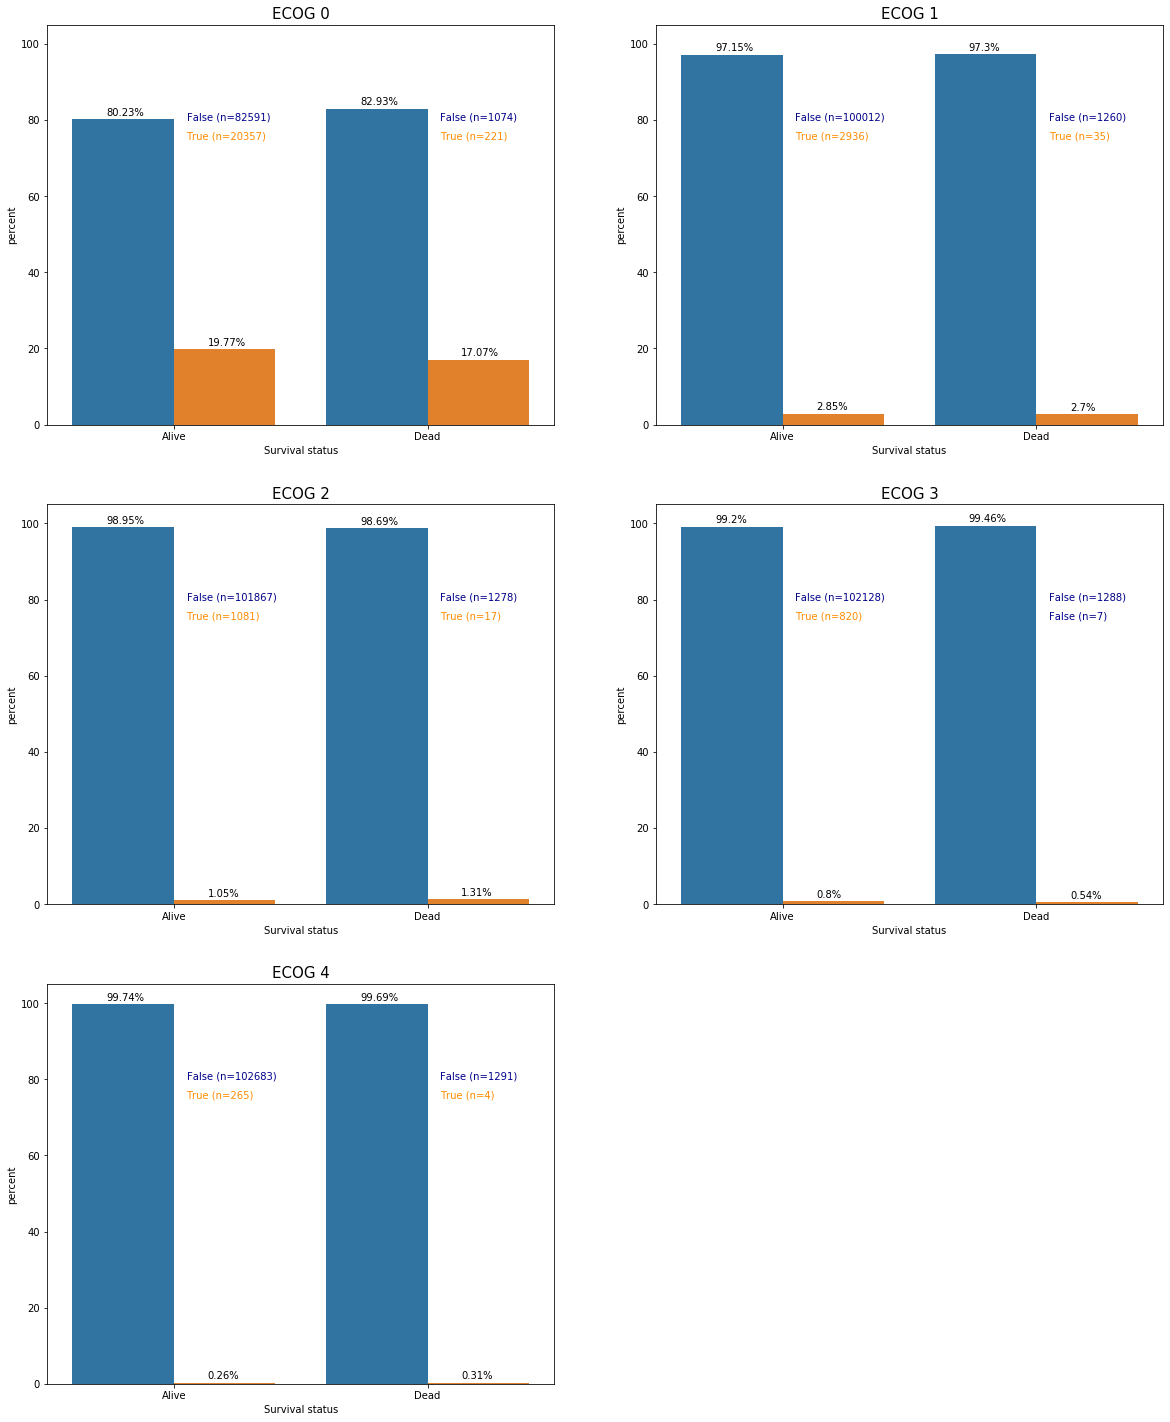

In [598]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'ECOG0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('ECOG 0', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=82591)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=20357)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1074)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=221)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'ECOG1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('ECOG 1', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, 'False (n=100012)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, 'True (n=2936)', horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, 'False (n=1260)', horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, 'True (n=35)', horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'ECOG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('ECOG 2', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=101867)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=1081)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1278)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=17)", horizontalalignment='left', size='medium', color='darkorange') 
    

#Figure 4
x, y = 'DEAD', 'ECOG3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('ECOG 3', fontsize=15) 
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102128)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=820)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1288)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "False (n=7)", horizontalalignment='left', size='medium', color='darkblue')

#Figure 5
x, y = 'DEAD', 'ECOG4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('ECOG 4', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=102683)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=265)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1291)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=4)", horizontalalignment='left', size='medium', color='darkorange')
 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [599]:
contingency = pd.crosstab(df['DEAD'], df['ECOG0'])
contingency

ECOG0,False,True
DEAD,,
0,82591,20357
1,1074,221


In [600]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.016473300558315633


In [601]:
contingency = pd.crosstab(df['DEAD'], df['ECOG1'])
contingency

ECOG1,False,True
DEAD,,
0,100012,2936
1,1260,35


In [602]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8129038627568338


In [603]:
contingency = pd.crosstab(df['DEAD'], df['ECOG2'])
contingency

ECOG2,False,True
DEAD,,
0,101867,1081
1,1278,17


In [604]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4334642305870303


In [605]:
contingency = pd.crosstab(df['DEAD'], df['ECOG3'])
contingency

ECOG3,False,True
DEAD,,
0,102128,820
1,1288,7


In [606]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3819719535064572


In [607]:
contingency = pd.crosstab(df['DEAD'], df['ECOG4'])
contingency

ECOG4,False,True
DEAD,,
0,102683,265
1,1291,4


In [608]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9304981594767449


In [609]:
df.groupby('DEAD')['ACE0'].value_counts()

DEAD  ACE0 
0     False    100166
      True       2782
1     False      1264
      True         31
Name: ACE0, dtype: int64

In [610]:
df.groupby('DEAD')['ACE1'].value_counts()

DEAD  ACE1 
0     False    102115
      True        833
1     False      1286
      True          9
Name: ACE1, dtype: int64

In [611]:
df.groupby('DEAD')['ACE2'].value_counts()

DEAD  ACE2 
0     False    102565
      True        383
1     False      1289
      True          6
Name: ACE2, dtype: int64

In [612]:
df.groupby('DEAD')['ACE3'].value_counts()

DEAD  ACE3 
0     False    102502
      True        446
1     False      1291
      True          4
Name: ACE3, dtype: int64

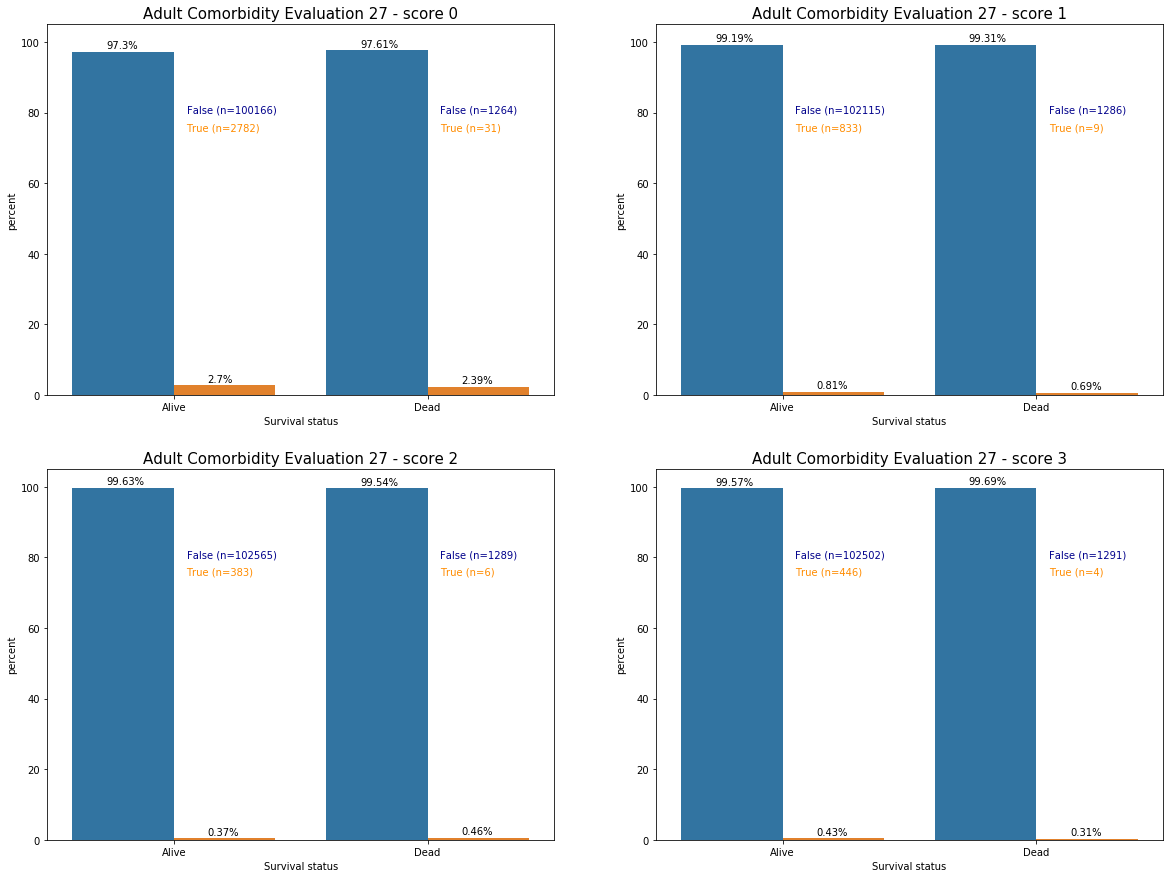

In [613]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'ACE0'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Adult Comorbidity Evaluation 27 - score 0', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=100166)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=2782)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1264)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=31)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'ACE1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Adult Comorbidity Evaluation 27 - score 1', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=102115)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=833)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1286)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=9)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'ACE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Adult Comorbidity Evaluation 27 - score 2', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
   
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=102565)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=383)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1289)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=6)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'ACE3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Adult Comorbidity Evaluation 27 - score 3', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102502)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=446)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1291)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=4)", horizontalalignment='left', size='medium', color='darkorange')
    
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [614]:
contingency = pd.crosstab(df['DEAD'], df['ACE0'])
contingency

ACE0,False,True
DEAD,,
0,100166,2782
1,1264,31


In [615]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5521114507880904


In [616]:
contingency = pd.crosstab(df['DEAD'], df['ACE1'])
contingency

ACE1,False,True
DEAD,,
0,102115,833
1,1286,9


In [617]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7642331356043754


In [618]:
contingency = pd.crosstab(df['DEAD'], df['ACE2'])
contingency

ACE2,False,True
DEAD,,
0,102565,383
1,1289,6


In [619]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.759515815330182


In [620]:
contingency = pd.crosstab(df['DEAD'], df['ACE3'])
contingency

ACE3,False,True
DEAD,,
0,102502,446
1,1291,4


In [621]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6419079584826568


In [622]:
df.groupby('DEAD')['LEFT'].value_counts()

DEAD  LEFT 
0     True     52886
      False    50062
1     True       689
      False      606
Name: LEFT, dtype: int64

In [623]:
df.groupby('DEAD')['RIGHT'].value_counts()

DEAD  RIGHT
0     False    53143
      True     49805
1     False      709
      True       586
Name: RIGHT, dtype: int64

In [624]:
df.groupby('DEAD')['MIDLINE'].value_counts()

DEAD  MIDLINE
0     False      102929
      True           19
1     False        1295
Name: MIDLINE, dtype: int64

In [625]:
df.groupby('DEAD')['BILATERAL'].value_counts()

DEAD  BILATERAL
0     False        102935
      True             13
1     False          1295
Name: BILATERAL, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


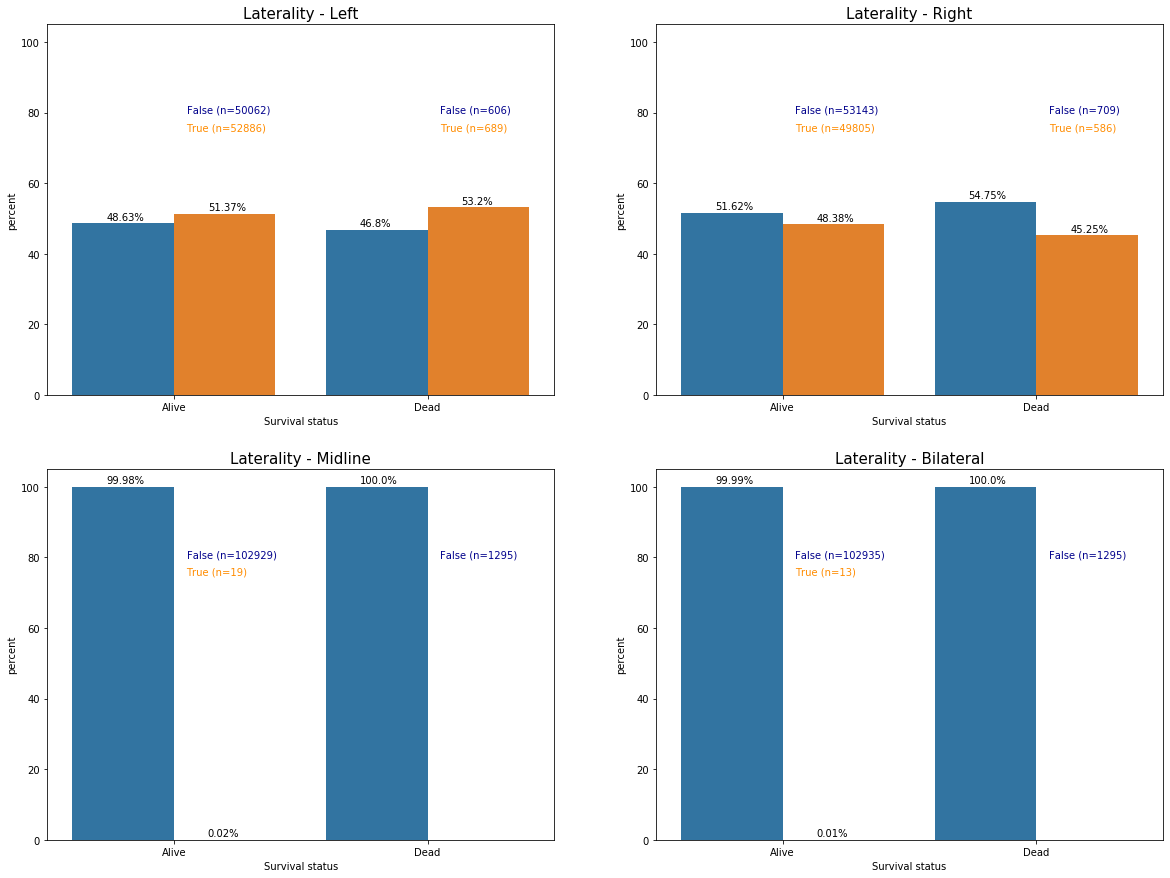

In [626]:
f, axes = plt.subplots(2, 2, figsize=(20, 15))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'LEFT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Laterality - Left', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=50062)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=52886)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=606)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=689)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'RIGHT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Laterality - Right', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=53143)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=49805)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=709)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=586)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'MIDLINE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Laterality - Midline', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=102929)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=19)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')
    

#Figure 4
x, y = 'DEAD', 'BILATERAL'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Laterality - Bilateral', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102935)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=13)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.show()

In [627]:
contingency = pd.crosstab(df['DEAD'], df['LEFT'])
contingency

LEFT,False,True
DEAD,,
0,50062,52886
1,606,689


In [628]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.1992766801732528


In [629]:
contingency = pd.crosstab(df['DEAD'], df['RIGHT'])
contingency

RIGHT,False,True
DEAD,,
0,53143,49805
1,709,586


In [630]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.027077671682953428


In [631]:
contingency = pd.crosstab(df['DEAD'], df['MIDLINE'])
contingency

MIDLINE,False,True
DEAD,,
0,102929,19
1,1295,0


In [632]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.5845303068550594


In [633]:
contingency = pd.crosstab(df['DEAD'], df['BILATERAL'])
contingency

BILATERAL,False,True
DEAD,,
0,102935,13
1,1295,0


In [634]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3966290252393806


In [635]:
df.groupby('DEAD')['DEPR1'].value_counts()

DEAD  DEPR1
0     False    78717
      True     24231
1     False      996
      True       299
Name: DEPR1, dtype: int64

In [636]:
df.groupby('DEAD')['DEPR2'].value_counts()

DEAD  DEPR2
0     False    79349
      True     23599
1     False      999
      True       296
Name: DEPR2, dtype: int64

In [637]:
df.groupby('DEAD')['DEPR3'].value_counts()

DEAD  DEPR3
0     False    81781
      True     21167
1     False     1012
      True       283
Name: DEPR3, dtype: int64

In [638]:
df.groupby('DEAD')['DEPR4'].value_counts()

DEAD  DEPR4
0     False    84410
      True     18538
1     False     1083
      True       212
Name: DEPR4, dtype: int64

In [639]:
df.groupby('DEAD')['DEPR5'].value_counts()

DEAD  DEPR5
0     False    87477
      True     15471
1     False     1090
      True       205
Name: DEPR5, dtype: int64

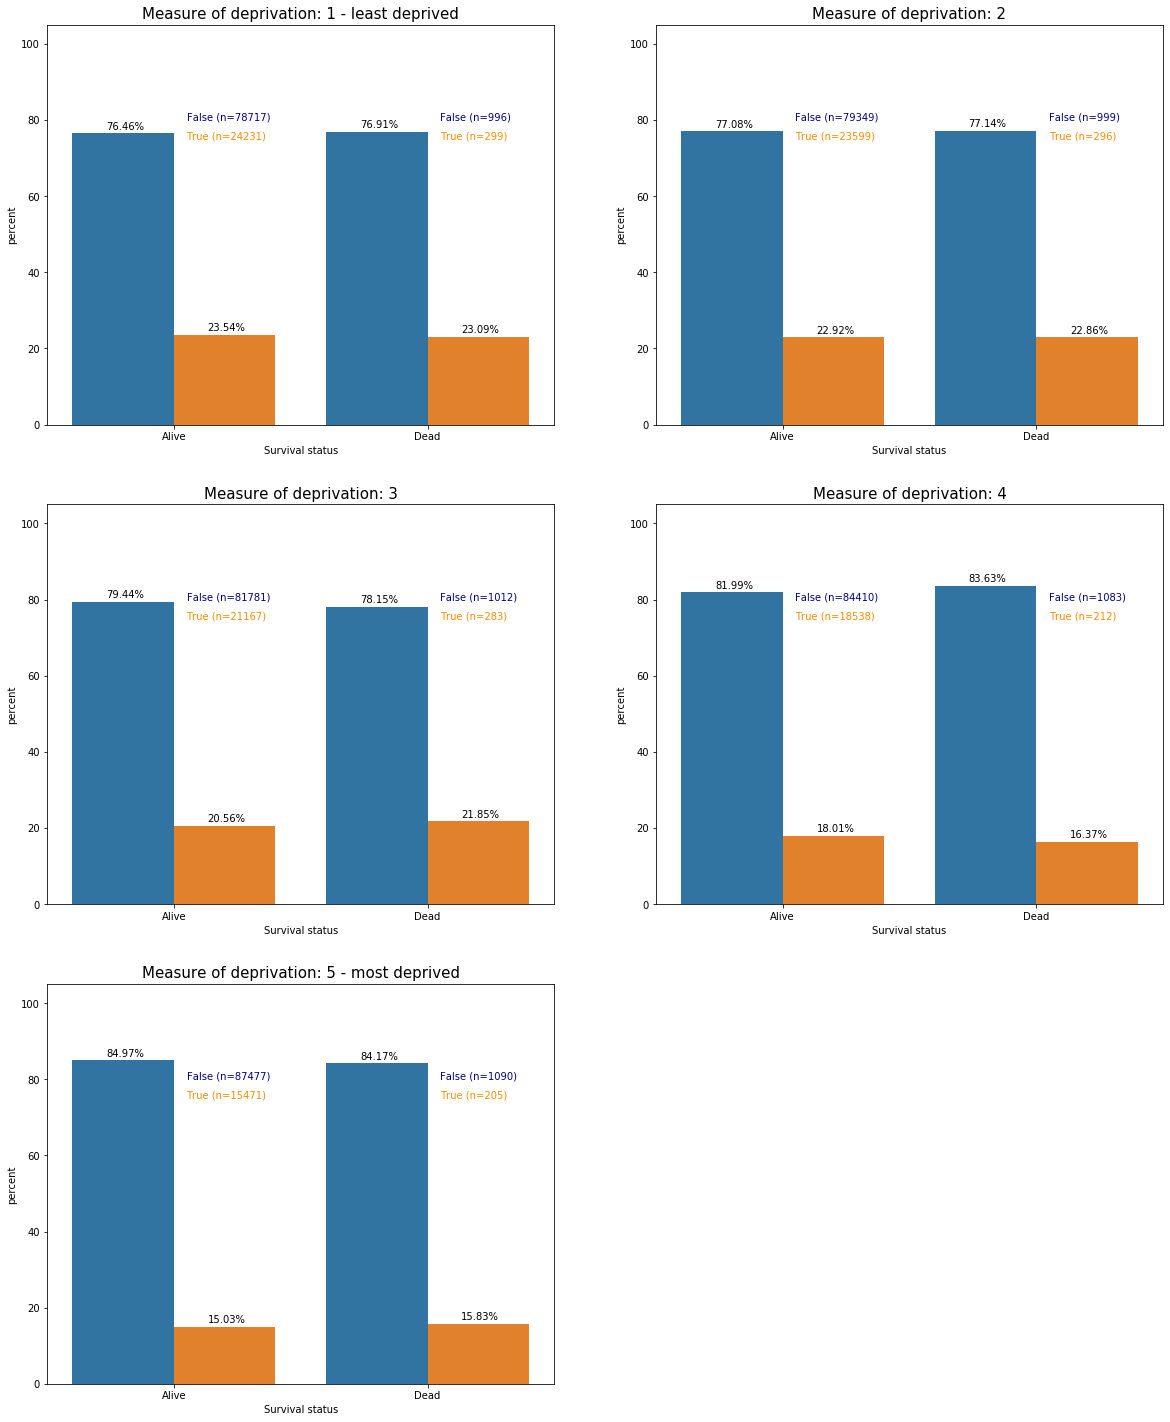

In [640]:
f, axes = plt.subplots(3, 2, figsize=(20, 25))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'DEPR1'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Measure of deprivation: 1 - least deprived', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=78717)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=24231)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=996)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=299)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 2
x, y = 'DEAD', 'DEPR2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Measure of deprivation: 2', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=79349)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=23599)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=999)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=296)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 3
x, y = 'DEAD', 'DEPR3'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Measure of deprivation: 3', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)
    
for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=81781)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=21167)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1012)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=283)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 4
x, y = 'DEAD', 'DEPR4'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Measure of deprivation: 4', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=84410)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=18538)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1083)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=212)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'DEPR5'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Measure of deprivation: 5 - most deprived', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=87477)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=15471)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1090)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=205)", horizontalalignment='left', size='medium', color='darkorange')    
    

plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
f.delaxes(ax = axes[2,1]) 
plt.show()

In [641]:
contingency = pd.crosstab(df['DEAD'], df['DEPR1'])
contingency

DEPR1,False,True
DEAD,,
0,78717,24231
1,996,299


In [642]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7300950643683759


In [643]:
contingency = pd.crosstab(df['DEAD'], df['DEPR2'])
contingency

DEPR2,False,True
DEAD,,
0,79349,23599
1,999,296


In [644]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9816832969138307


In [645]:
contingency = pd.crosstab(df['DEAD'], df['DEPR3'])
contingency

DEPR3,False,True
DEAD,,
0,81781,21167
1,1012,283


In [646]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.26755420918982203


In [647]:
contingency = pd.crosstab(df['DEAD'], df['DEPR4'])
contingency

DEPR4,False,True
DEAD,,
0,84410,18538
1,1083,212


In [648]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.13692139669250628


In [649]:
contingency = pd.crosstab(df['DEAD'], df['DEPR5'])
contingency

DEPR5,False,True
DEAD,,
0,87477,15471
1,1090,205


In [650]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4452127328857636


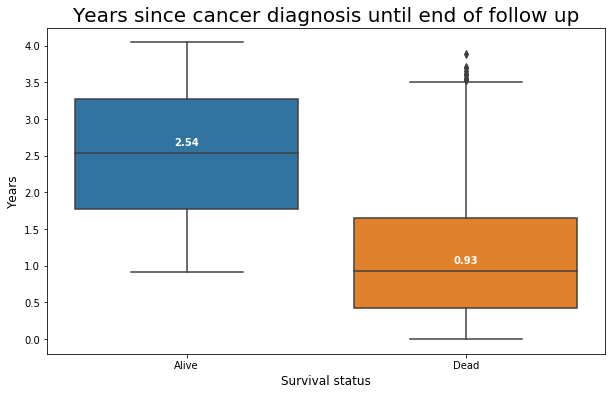

In [651]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'CANCER_YEARS_MEAN')

medians = df.groupby(['DEAD'])['CANCER_YEARS_MEAN'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('Years', fontsize=12)
ax.set_title('Years since cancer diagnosis until end of follow up', fontsize=20)
plt.gcf().set_size_inches(10,6)

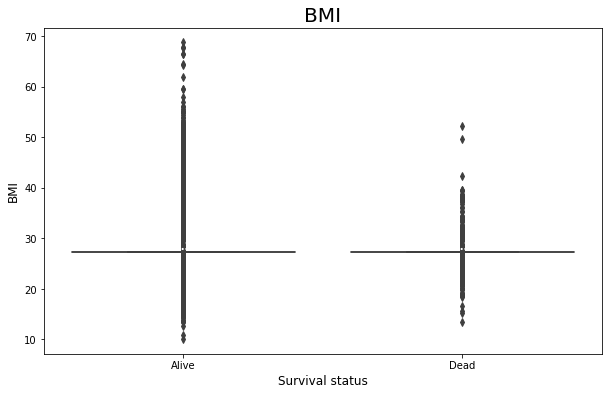

In [652]:
ax = sns.boxplot(data = df, x = 'DEAD', y = 'BMI')

medians = df.groupby(['DEAD'])['BMI'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
            horizontalalignment='center', size='medium', color='white', weight='semibold')

ax.set_xticklabels(['Alive','Dead'])
ax.set_xlabel('Survival status', fontsize=12)
ax.set_ylabel('BMI', fontsize=12)
ax.set_title('BMI', fontsize=20)
plt.gcf().set_size_inches(10,6)

In [653]:
df['BMI'].describe()

count    104243.000000
mean         27.510025
std           2.560004
min          10.097546
25%          27.377686
50%          27.377686
75%          27.377686
max          68.796725
Name: BMI, dtype: float64

In [654]:
df.groupby('DEAD')['NEOADJUVANT'].value_counts()

DEAD  NEOADJUVANT
0     False          94290
      True            8658
1     False           1176
      True             119
Name: NEOADJUVANT, dtype: int64

In [655]:
df.groupby('DEAD')['DIAGNOSTIC'].value_counts()

DEAD  DIAGNOSTIC
0     False         101814
      True            1134
1     False           1284
      True              11
Name: DIAGNOSTIC, dtype: int64

In [656]:
df.groupby('DEAD')['PALLIATIVE'].value_counts()

DEAD  PALLIATIVE
0     False         95420
      True           7528
1     False          1184
      True            111
Name: PALLIATIVE, dtype: int64

In [657]:
df.groupby('DEAD')['CURATIVE'].value_counts()

DEAD  CURATIVE
0     False       99963
      True         2985
1     False        1257
      True           38
Name: CURATIVE, dtype: int64

In [658]:
df.groupby('DEAD')['ADJUVANT'].value_counts()

DEAD  ADJUVANT
0     False       81749
      True        21199
1     False        1034
      True          261
Name: ADJUVANT, dtype: int64

In [659]:
df.groupby('DEAD')['DISEASE_MOD'].value_counts()

DEAD  DISEASE_MOD
0     False          102875
      True               73
1     False            1294
      True                1
Name: DISEASE_MOD, dtype: int64

In [660]:
df.groupby('DEAD')['STAGING'].value_counts()

DEAD  STAGING
0     False      102944
      True            4
1     False        1295
Name: STAGING, dtype: int64

posx and posy should be finite values
posx and posy should be finite values


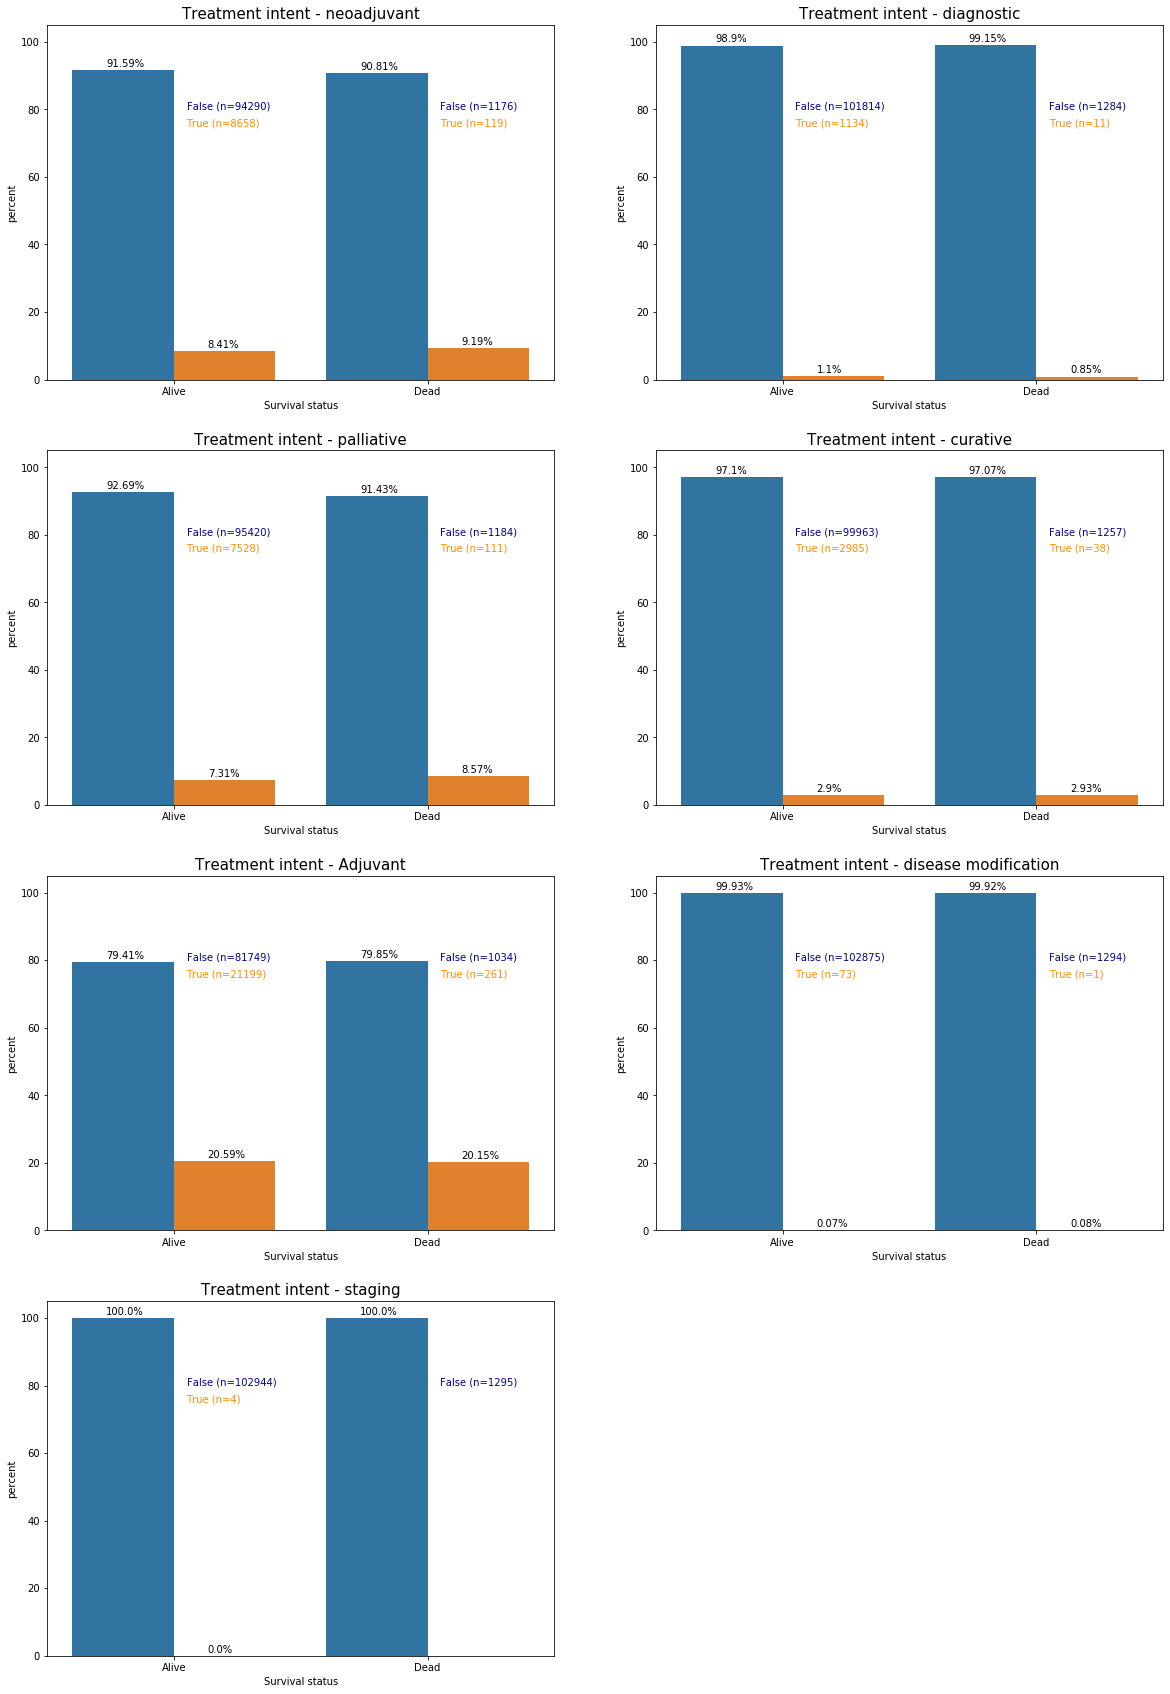

In [661]:
f, axes = plt.subplots(4, 2, figsize=(20, 30))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'NEOADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Treatment intent - neoadjuvant', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=94290)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=8658)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=1176)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=119)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'DIAGNOSTIC'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Treatment intent - diagnostic', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=101814)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=1134)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1284)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=11)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'PALLIATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Treatment intent - palliative', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=95420)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=7528)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1184)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=111)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CURATIVE'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Treatment intent - curative', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=99963)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=2985)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1257)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=38)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'ADJUVANT'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Treatment intent - Adjuvant', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=81749)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=21199)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1034)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(1.05, 75, "True (n=261)", horizontalalignment='left', size='medium', color='darkorange')

#Figure 6
x, y = 'DEAD', 'DISEASE_MOD'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('Treatment intent - disease modification', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=102875)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=73)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1294)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(1.05, 75, "True (n=1)", horizontalalignment='left', size='medium', color='darkorange')  


#Figure 7
x, y = 'DEAD', 'STAGING'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('Treatment intent - staging', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)    
    
for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=102944)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=4)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')

 
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
f.delaxes(ax = axes[3,1]) 
plt.show()

In [662]:
contingency = pd.crosstab(df['DEAD'], df['NEOADJUVANT'])
contingency

NEOADJUVANT,False,True
DEAD,,
0,94290,8658
1,1176,119


In [663]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.3405658063866499


In [664]:
contingency = pd.crosstab(df['DEAD'], df['DIAGNOSTIC'])
contingency

DIAGNOSTIC,False,True
DEAD,,
0,101814,1134
1,1284,11


In [665]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.4648584284638272


In [666]:
contingency = pd.crosstab(df['DEAD'], df['PALLIATIVE'])
contingency

PALLIATIVE,False,True
DEAD,,
0,95420,7528
1,1184,111


In [667]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.09411436931726194


In [668]:
contingency = pd.crosstab(df['DEAD'], df['CURATIVE'])
contingency

CURATIVE,False,True
DEAD,,
0,99963,2985
1,1257,38


In [669]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.9927650425065021


In [670]:
contingency = pd.crosstab(df['DEAD'], df['ADJUVANT'])
contingency

ADJUVANT,False,True
DEAD,,
0,81749,21199
1,1034,261


In [671]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7245504990834768


In [672]:
contingency = pd.crosstab(df['DEAD'], df['DISEASE_MOD'])
contingency

DISEASE_MOD,False,True
DEAD,,
0,102875,73
1,1294,1


In [673]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6597846501291001


In [674]:
contingency = pd.crosstab(df['DEAD'], df['STAGING'])
contingency

STAGING,False,True
DEAD,,
0,102944,4
1,1295,0


In [675]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.042074243782237564


In [676]:
df.groupby('DEAD')['CT_YES'].value_counts()

DEAD  CT_YES
0     False     101322
      True        1626
1     False       1272
      True          23
Name: CT_YES, dtype: int64

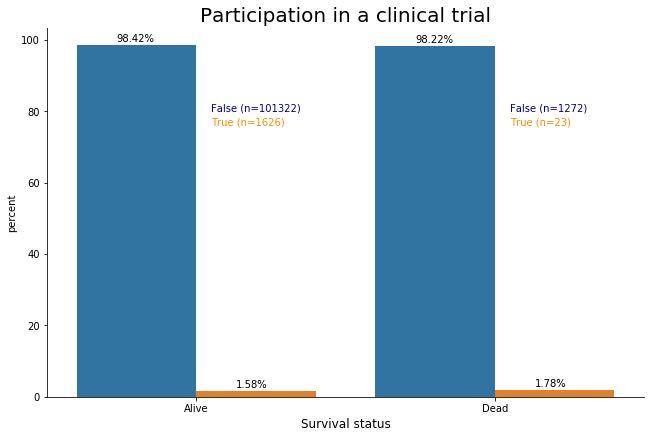

In [677]:
x, y = 'DEAD', 'CT_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Participation in a clinical trial', fontsize=20)
ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=101322)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=1626)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=1272)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=23)", horizontalalignment='left', size='medium', color='darkorange');

In [678]:
contingency = pd.crosstab(df['DEAD'], df['CT_YES'])
contingency

CT_YES,False,True
DEAD,,
0,101322,1626
1,1272,23


In [679]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.6516324532879343


In [680]:
df.groupby('DEAD')['CHEM_RAD_YES'].value_counts()

DEAD  CHEM_RAD_YES
0     False           102626
      True               322
1     False             1290
      True                 5
Name: CHEM_RAD_YES, dtype: int64

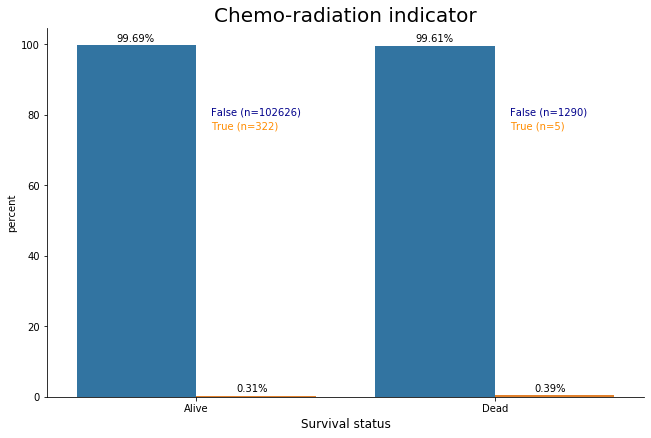

In [681]:
x, y = 'DEAD', 'CHEM_RAD_YES'

ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', legend=False))

ax.ax.set_title('Chemo-radiation indicator', fontsize=20)
ax.ax.set_xticklabels(['Alive','Dead'])
ax.ax.set_xlabel('Survival status', fontsize=12)
plt.gcf().set_size_inches(10,6)
    
for p in ax.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    ax.ax.text(txt_x,txt_y,txt)
    
ax.ax.text(0.05, 80, "False (n=102626)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(0.05, 76, "True (n=322)", horizontalalignment='left', size='medium', color='darkorange')
ax.ax.text(1.05, 80, "False (n=1290)", horizontalalignment='left', size='medium', color='darkblue')
ax.ax.text(1.05, 76, "True (n=5)", horizontalalignment='left', size='medium', color='darkorange');

In [682]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RAD_YES'])
contingency

CHEM_RAD_YES,False,True
DEAD,,
0,102626,322
1,1290,5


In [683]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8267456329400533


In [684]:
df.groupby('DEAD')['CHEMOTHERAPY2'].value_counts()

DEAD  CHEMOTHERAPY2
0     False            80769
      True             22179
1     False              996
      True               299
Name: CHEMOTHERAPY2, dtype: int64

In [685]:
df.groupby('DEAD')['TARGETED2'].value_counts()

DEAD  TARGETED2
0     False        95035
      True          7913
1     False         1184
      True           111
Name: TARGETED2, dtype: int64

In [686]:
df.groupby('DEAD')['CHEM_TARG2'].value_counts()

DEAD  CHEM_TARG2
0     False         99670
      True           3278
1     False          1256
      True             39
Name: CHEM_TARG2, dtype: int64

In [687]:
df.groupby('DEAD')['CHEM_RADIO2'].value_counts()

DEAD  CHEM_RADIO2
0     False          102861
      True               87
1     False            1292
      True                3
Name: CHEM_RADIO2, dtype: int64

In [688]:
df.groupby('DEAD')['TARG_RADIO2'].value_counts()

DEAD  TARG_RADIO2
0     False          102939
      True                9
1     False            1295
Name: TARG_RADIO2, dtype: int64

In [689]:
df.groupby('DEAD')['CHEM_RADIO_TARG2'].value_counts()

DEAD  CHEM_RADIO_TARG2
0     False               102946
      True                     2
1     False                 1295
Name: CHEM_RADIO_TARG2, dtype: int64

In [690]:
df.groupby('DEAD')['HORM_TARG2'].value_counts()

DEAD  HORM_TARG2
0     False         102895
      True              53
1     False           1294
      True               1
Name: HORM_TARG2, dtype: int64

In [691]:
df.groupby('DEAD')['HORMONE2'].value_counts()

DEAD  HORMONE2
0     False       99392
      True         3556
1     False        1252
      True           43
Name: HORMONE2, dtype: int64

In [692]:
df.groupby('DEAD')['OTHER2'].value_counts()

DEAD  OTHER2
0     False     102040
      True         908
1     False       1284
      True          11
Name: OTHER2, dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


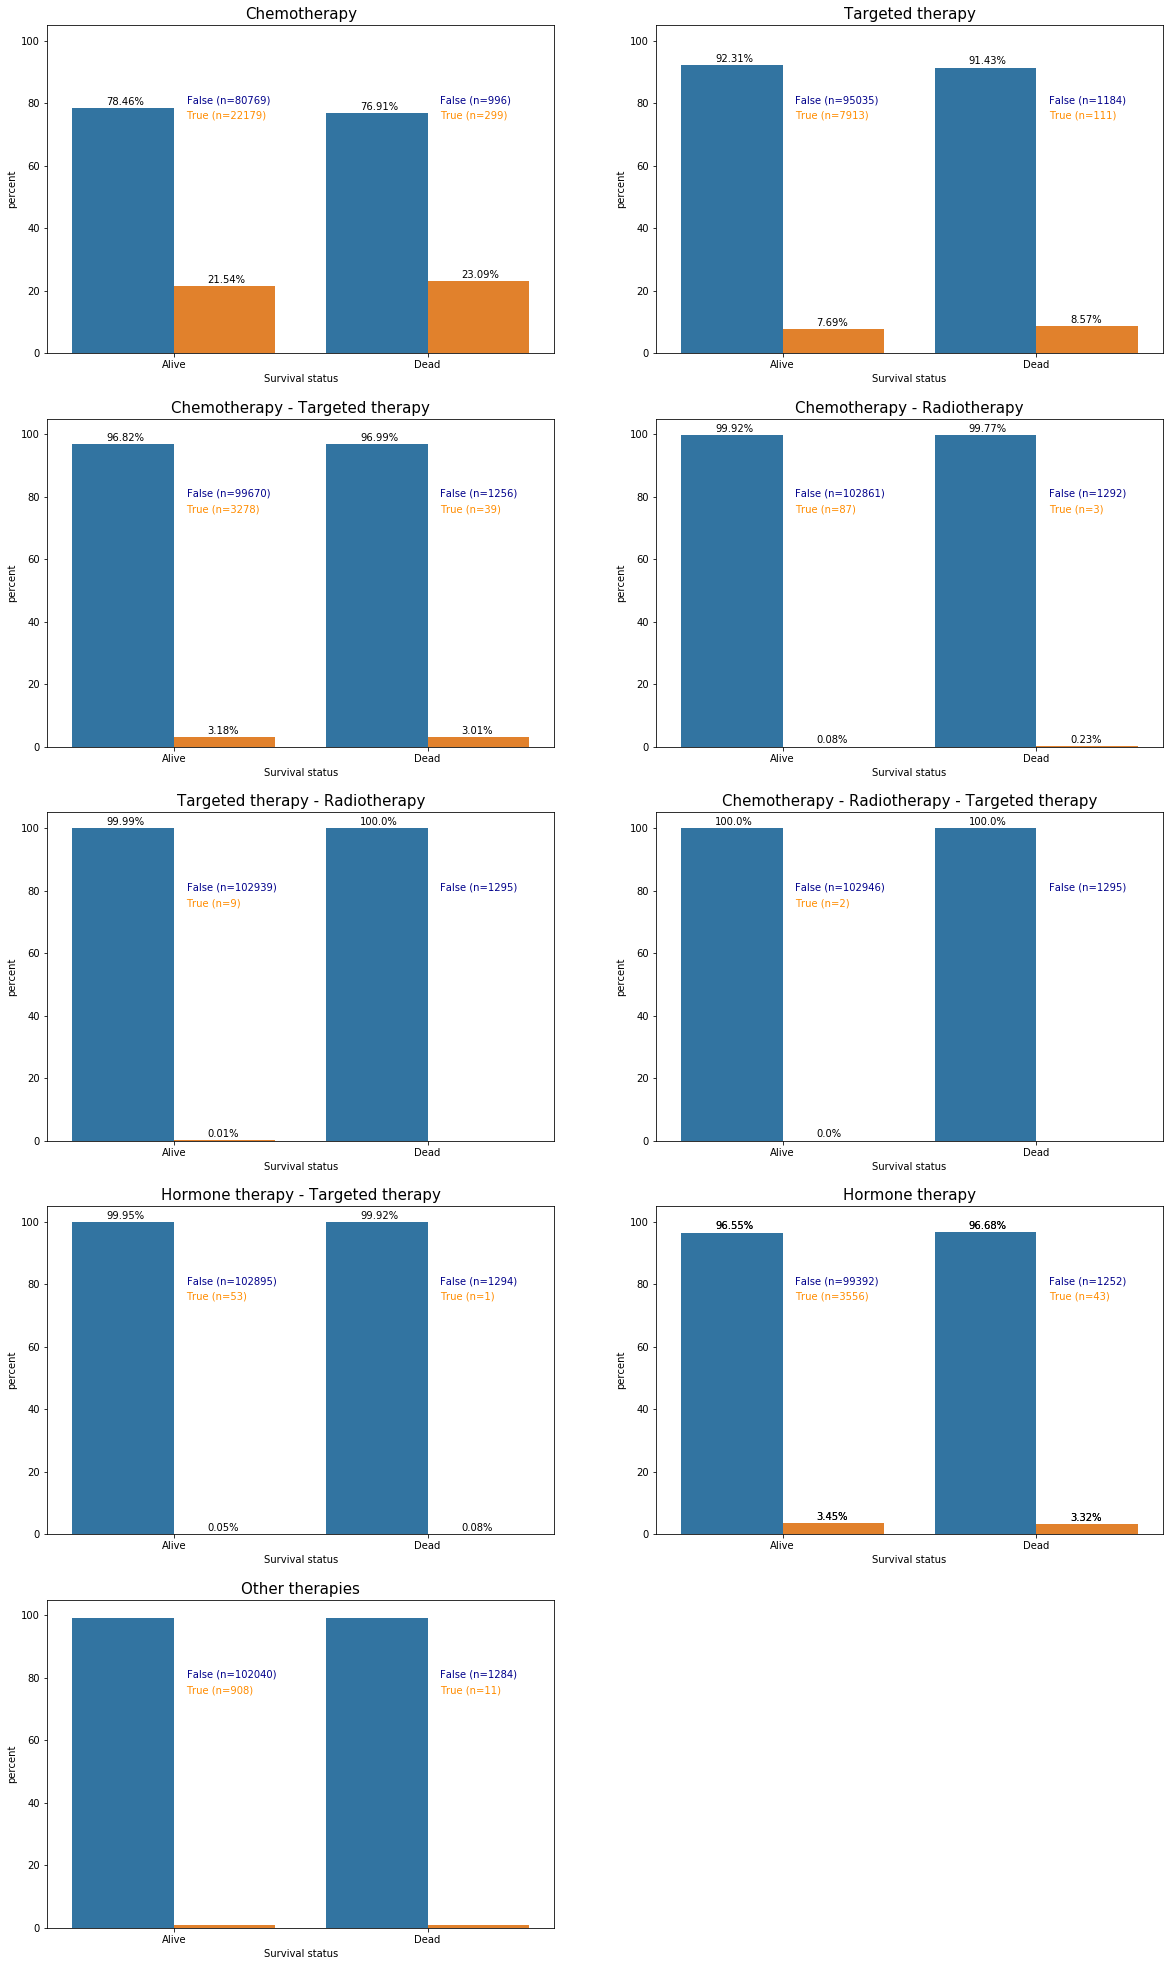

In [693]:
f, axes = plt.subplots(5, 2, figsize=(20, 35))
# sns.despine(left=True)

#Figure 1
x, y = 'DEAD', 'CHEMOTHERAPY2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 0]))

axes[0,0].set_title('Chemotherapy', fontsize=15)
axes[0,0].set(xticklabels=['Alive','Dead'])
axes[0,0].set(xlabel='Survival status')
axes[0,0].set_ylim(0,105)
axes[0,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,0].text(txt_x,txt_y,txt)
    
axes[0,0].text(0.05, 80, "False (n=80769)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(0.05, 75, "True (n=22179)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,0].text(1.05, 80, "False (n=996)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,0].text(1.05, 75, "True (n=299)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 2
x, y = 'DEAD', 'TARGETED2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[0, 1]))

axes[0,1].set_title('Targeted therapy', fontsize=15)
axes[0,1].set(xticklabels=['Alive','Dead'])
axes[0,1].set(xlabel='Survival status')
axes[0,1].set_ylim(0,105)
axes[0,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[0,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[0,1].text(txt_x,txt_y,txt)

axes[0,1].text(0.05, 80, "False (n=95035)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(0.05, 75, "True (n=7913)", horizontalalignment='left', size='medium', color='darkorange')
axes[0,1].text(1.05, 80, "False (n=1184)", horizontalalignment='left', size='medium', color='darkblue')
axes[0,1].text(1.05, 75, "True (n=111)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 3
x, y = 'DEAD', 'CHEM_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 0]))

axes[1,0].set_title('Chemotherapy - Targeted therapy', fontsize=15)
axes[1,0].set(xticklabels=['Alive','Dead'])
axes[1,0].set(xlabel='Survival status')
axes[1,0].set_ylim(0,105)
axes[1,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,0].text(txt_x,txt_y,txt)

axes[1,0].text(0.05, 80, "False (n=99670)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(0.05, 75, "True (n=3278)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,0].text(1.05, 80, "False (n=1256)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,0].text(1.05, 75, "True (n=39)", horizontalalignment='left', size='medium', color='darkorange')
    

#Figure 4
x, y = 'DEAD', 'CHEM_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[1, 1]))

axes[1,1].set_title('Chemotherapy - Radiotherapy', fontsize=15)
axes[1,1].set(xticklabels=['Alive','Dead'])
axes[1,1].set(xlabel='Survival status')
axes[1,1].set_ylim(0,105)
axes[1,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[1,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[1,1].text(txt_x,txt_y,txt)

axes[1,1].text(0.05, 80, "False (n=102861)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(0.05, 75, "True (n=87)", horizontalalignment='left', size='medium', color='darkorange')
axes[1,1].text(1.05, 80, "False (n=1292)", horizontalalignment='left', size='medium', color='darkblue')
axes[1,1].text(1.05, 75, "True (n=3)", horizontalalignment='left', size='medium', color='darkorange')


#Figure 5
x, y = 'DEAD', 'TARG_RADIO2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 0]))

axes[2,0].set_title('Targeted therapy - Radiotherapy', fontsize=15)
axes[2,0].set(xticklabels=['Alive','Dead'])
axes[2,0].set(xlabel='Survival status')
axes[2,0].set_ylim(0,105)
axes[2,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,0].text(txt_x,txt_y,txt)

axes[2,0].text(0.05, 80, "False (n=102939)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,0].text(0.05, 75, "True (n=9)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,0].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')


#Figure 6
x, y = 'DEAD', 'CHEM_RADIO_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[2, 1]))

axes[2,1].set_title('Chemotherapy - Radiotherapy - Targeted therapy', fontsize=15)
axes[2,1].set(xticklabels=['Alive','Dead'])
axes[2,1].set(xlabel='Survival status')
axes[2,1].set_ylim(0,105)
axes[2,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[2,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[2,1].text(txt_x,txt_y,txt)

axes[2,1].text(0.05, 80, "False (n=102946)", horizontalalignment='left', size='medium', color='darkblue')
axes[2,1].text(0.05, 75, "True (n=2)", horizontalalignment='left', size='medium', color='darkorange')
axes[2,1].text(1.05, 80, "False (n=1295)", horizontalalignment='left', size='medium', color='darkblue')


#Figure 7
x, y = 'DEAD', 'HORM_TARG2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 0]))

axes[3,0].set_title('Hormone therapy - Targeted therapy', fontsize=15)
axes[3,0].set(xticklabels=['Alive','Dead'])
axes[3,0].set(xlabel='Survival status')
axes[3,0].set_ylim(0,105)
axes[3,0].get_legend().remove()
plt.gcf().set_size_inches(10,6)   

for p in axes[3,0].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,0].text(txt_x,txt_y,txt)
    
axes[3,0].text(0.05, 80, "False (n=102895)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(0.05, 75, "True (n=53)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,0].text(1.05, 80, "False (n=1294)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,0].text(1.05, 75, "True (n=1)", horizontalalignment='left', size='medium', color='darkorange')
    
    
#Figure 8
x, y = 'DEAD', 'HORMONE2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[3, 1]))

axes[3,1].set_title('Hormone therapy', fontsize=15)
axes[3,1].set(xticklabels=['Alive','Dead'])
axes[3,1].set(xlabel='Survival status')
axes[3,1].set_ylim(0,105)
axes[3,1].get_legend().remove()
plt.gcf().set_size_inches(10,6)

for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[3,1].text(0.05, 80, "False (n=99392)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(0.05, 75, "True (n=3556)", horizontalalignment='left', size='medium', color='darkorange')
axes[3,1].text(1.05, 80, "False (n=1252)", horizontalalignment='left', size='medium', color='darkblue')
axes[3,1].text(1.05, 75, "True (n=43)", horizontalalignment='left', size='medium', color='darkorange')   


#Figure 9
x, y = 'DEAD', 'OTHER2'
ax = (df.groupby(x)[y]
 .value_counts(normalize=True)
 .mul(100)
 .rename('percent')
 .reset_index()
 .pipe((sns.catplot,'data'), x = x, y = 'percent', hue = y, kind = 'bar', ax=axes[4, 0]))

axes[4,0].set_title('Other therapies', fontsize=15)
axes[4,0].set(xticklabels=['Alive','Dead'])
axes[4,0].set(xlabel='Survival status')
axes[4,0].set_ylim(0,105)
axes[4,0].get_legend().remove()
plt.gcf().set_size_inches(10,6) 
    
for p in axes[3,1].patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() + p.get_width() / 3
    txt_y = p.get_height() + 1
    axes[3,1].text(txt_x,txt_y,txt)
    
axes[4,0].text(0.05, 80, "False (n=102040)", horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(0.05, 75, "True (n=908)", horizontalalignment='left', size='medium', color='darkorange')
axes[4,0].text(1.05, 80, "False (n=1284)", horizontalalignment='left', size='medium', color='darkblue')
axes[4,0].text(1.05, 75, "True (n=11)", horizontalalignment='left', size='medium', color='darkorange')
     
plt.close(2)
plt.close(3)
plt.close(4)
plt.close(5)
plt.close(6)
plt.close(7)
plt.close(8)
plt.close(9)
plt.close(10)
f.delaxes(ax = axes[4,1]) 
plt.show()

In [694]:
contingency = pd.crosstab(df['DEAD'], df['CHEMOTHERAPY2'])
contingency

CHEMOTHERAPY2,False,True
DEAD,,
0,80769,22179
1,996,299


In [695]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.19039298185583456


In [696]:
contingency = pd.crosstab(df['DEAD'], df['TARGETED2'])
contingency

TARGETED2,False,True
DEAD,,
0,95035,7913
1,1184,111


In [697]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2563983314008824


In [698]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_TARG2'])
contingency

CHEM_TARG2,False,True
DEAD,,
0,99670,3278
1,1256,39


In [699]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.7856929599762759


In [700]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RADIO2'])
contingency

CHEM_RADIO2,False,True
DEAD,,
0,102861,87
1,1292,3


In [701]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.18827326710855982


In [702]:
contingency = pd.crosstab(df['DEAD'], df['TARG_RADIO2'])
contingency

TARG_RADIO2,False,True
DEAD,,
0,102939,9
1,1295,0


In [703]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.2426912864938984


In [704]:
contingency = pd.crosstab(df['DEAD'], df['CHEM_RADIO_TARG2'])
contingency

CHEM_RADIO_TARG2,False,True
DEAD,,
0,102946,2
1,1295,0


In [705]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.002418309336130455


In [706]:
contingency = pd.crosstab(df['DEAD'], df['HORM_TARG2'])
contingency

HORM_TARG2,False,True
DEAD,,
0,102895,53
1,1294,1


In [707]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8337130148498951


In [708]:
contingency = pd.crosstab(df['DEAD'], df['HORMONE2'])
contingency

HORMONE2,False,True
DEAD,,
0,99392,3556
1,1252,43


In [709]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.8529759300993369


In [710]:
contingency = pd.crosstab(df['DEAD'], df['OTHER2'])
contingency

OTHER2,False,True
DEAD,,
0,102040,908
1,1284,11


In [711]:
chi2_stat, p_val, dof, expected = chi2_contingency(contingency)
print(p_val)

0.980106504778115


In [712]:
df.head()

,PATIENTID,SEX,ETHNICITY,NUMBER_TUMOURS,SC500,SC501,SC502,SC503,SC504,SC505,SC506,SC508,BEH_BENIGN,BEH_MALIG,BEH_MICINV,BEH_INSITU,BEH_UNCERT,T0,T1,T2,T3,T4,N0,N1,N2,N3,M1,STAGE0,STAGE1,STAGE2,STAGE3,STAGE4,GRADE1,GRADE2,GRADE3,GRADE4,AGE_MEAN,L0801,L1001,L1701,L0201,L0401,L1201,L0301,L0901,ER_POS,PR_POS,HER_POS,CURATIVE_TREAT,NONCURATIVE_TREAT,NO_ACTIVE_TREAT,ECOG0,ECOG1,ECOG2,ECOG3,ECOG4,ACE0,ACE1,ACE2,ACE3,LEFT,RIGHT,MIDLINE,BILATERAL,DEPR1,DEPR2,DEPR3,DEPR4,DEPR5,CANCER_DAYS_MEAN,CANCER_MONTHS_MEAN,CANCER_YEARS_MEAN,BMI,NEOADJUVANT,DIAGNOSTIC,PALLIATIVE,CURATIVE,ADJUVANT,DISEASE_MOD,STAGING,CT_YES,CHEM_RAD_YES,CHEMOTHERAPY2,TARGETED2,CHEM_TARG2,CHEM_RADIO2,TARG_RADIO2,CHEM_RADIO_TARG2,HORM_TARG2,HORMONE2,OTHER2,DEAD
0,10000752,F,White British,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,68.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,432.0,14.193310,1.182776,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
1,10001050,F,White British,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,86.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,450.0,14.784698,1.232058,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,10001824,F,Other ethnic group,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,87.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,674.0,22.144192,1.845349,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10002078,F,NaN,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,72.0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,584.0,19.187252,1.598938,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
4,10003284,F,NaN,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,80.0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,829.0,27.236699,2.269725,27.377686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0
